Converged after 5 iterations.


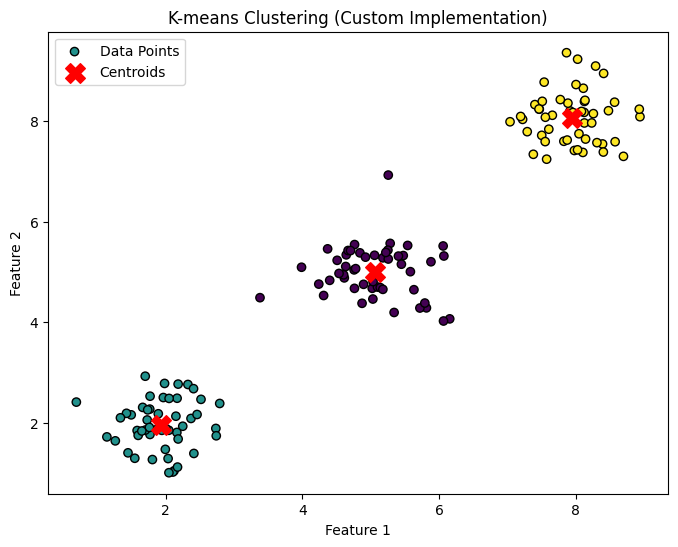

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist  # Optional: for distance calculation

def initialize_centroids(X, k):
    """
    Randomly selects k unique points from the dataset X as initial centroids.
    """
    indices = np.random.choice(X.shape[0], k, replace=False)
    centroids = X[indices]
    return centroids

def assign_clusters(X, centroids):
    """
    Assigns each data point in X to the nearest centroid.
    This version uses scipy's cdist to compute pairwise Euclidean distances.
    """
    distances = cdist(X, centroids, metric='euclidean')
    labels = np.argmin(distances, axis=1)
    return labels

def update_centroids(X, labels, k):
    """
    Recomputes centroids as the mean of all data points assigned to each cluster.
    """
    centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
    return centroids

def kmeans(X, k, max_iter=100, tol=1e-4):
    """
    Executes the K-means clustering algorithm.
    
    Parameters:
      - X: Data points, a NumPy array of shape (n_samples, n_features)
      - k: Number of clusters
      - max_iter: Maximum number of iterations
      - tol: Tolerance for convergence (based on centroid movement)
      
    Returns:
      - centroids: Final computed centroids
      - labels: Cluster assignments for each data point
    """
    centroids = initialize_centroids(X, k)
    for i in range(max_iter):
        old_centroids = centroids.copy()
        labels = assign_clusters(X, centroids)
        centroids = update_centroids(X, labels, k)
        # Check for convergence: if centroids change is below tolerance, break
        if np.linalg.norm(centroids - old_centroids) < tol:
            print(f"Converged after {i+1} iterations.")
            break
    return centroids, labels

# Example usage:
if __name__ == "__main__":
    # Generate synthetic data: three clusters in 2D
    np.random.seed(42)
    cluster1 = np.random.normal(loc=(2, 2), scale=0.5, size=(50, 2))
    cluster2 = np.random.normal(loc=(8, 8), scale=0.5, size=(50, 2))
    cluster3 = np.random.normal(loc=(5, 5), scale=0.5, size=(50, 2))
    X = np.vstack([cluster1, cluster2, cluster3])
    
    k = 3  # Number of clusters
    centroids, labels = kmeans(X, k)
    
    # Plotting the results
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolors='k', label="Data Points")
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label="Centroids")
    plt.title("K-means Clustering (Custom Implementation)")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()


In [2]:
def process_data(data):
    # process and return the data
    return data * 2

if __name__ == "__main__":
    # Test the function when run directly
    sample_data = 10
    print("Processed data:", process_data(sample_data))


Processed data: 20


In [3]:
# k clustering

Converged after 3 iterations


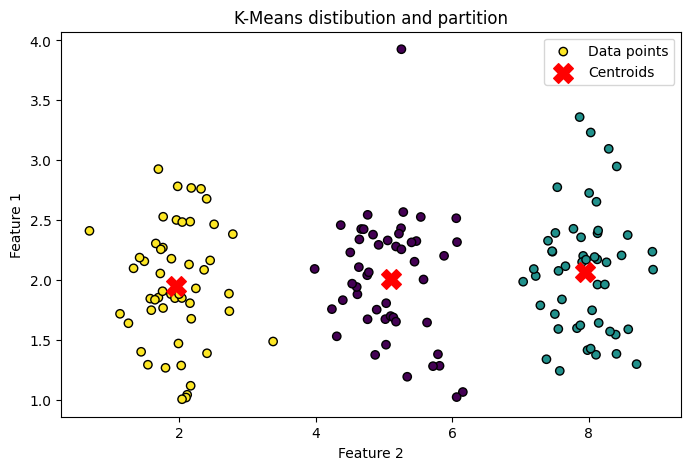

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

np.random.seed(42)


import numpy as np
from scipy.spatial.distance import cdist

def initialize_clusters(input_x, k):
    n_samples = input_x.shape[0]
    centroids = []
    
    # Step 1: Choose the first centroid randomly
    first_index = np.random.randint(0, n_samples)
    centroids.append(input_x[first_index])
    
    # Step 2: Choose the remaining k-1 centroids
    for _ in range(1, k):
        # Compute squared distances from each point to the nearest centroid
        distances = np.min(cdist(input_x, np.array(centroids), metric='euclidean')**2, axis=1)
        
        # Create a probability distribution proportional to the squared distances
        probabilities = distances / distances.sum()
        
        # Choose a new centroid using the computed probabilities
        next_index = np.random.choice(n_samples, p=probabilities)
        centroids.append(input_x[next_index])
        
    return np.array(centroids)


def assign_centroids_x(input_x, centroids):
    # obtaining the distance between the similarity data points of x and centroids

    distance = cdist(input_x, centroids, metric = 'euclidean')
    labels = np.argmin(distance, axis = 1)
    return labels

def update_centroids(input_x, labels, k):                    
    centroids = np.array([input_x[labels == i].mean(axis=0) for i in range(k)])
    return centroids


def kmeans(input_x, k, epochs = 100, tol = 1e-4):
    centroids = initialize_clusters(input_x, k)

    for i in range(epochs):
        old_centroid = centroids.copy()
        labels = assign_centroids_x(input_x, centroids)
        centroids = update_centroids(input_x, labels, k)

        if np.linalg.norm(centroids - old_centroid) < tol:
            print(f"Converged after {i + 1} iterations")
            break
    return centroids, labels


k = 3
cluster1 = np.random.normal(loc=(2,2), scale = 0.5, size = (50,2))
cluster2 = np.random.normal(loc=(8,2), scale = 0.5, size = (50,2))
cluster3 = np.random.normal(loc=(5,2), scale = 0.5, size = (50,2))

x = np.vstack([cluster1,cluster2,cluster3])

# no of clusters
Centroids, Labels = kmeans(x, k)

# ploting
plt.figure(figsize=(8,5))
plt.scatter(x[:,0], x[:,1], c=Labels, cmap = 'viridis', edgecolors = 'k', label = "Data points" )
plt.scatter(Centroids[:,0], Centroids[:,1], marker= 'X', s = 200, color = 'red', label='Centroids')
plt.legend()
plt.title("K-Means distibution and partition")
plt.ylabel("Feature 1")
plt.xlabel("Feature 2")
plt.show()

Converged after 6 iterations
Inertia: 85.30589165908556


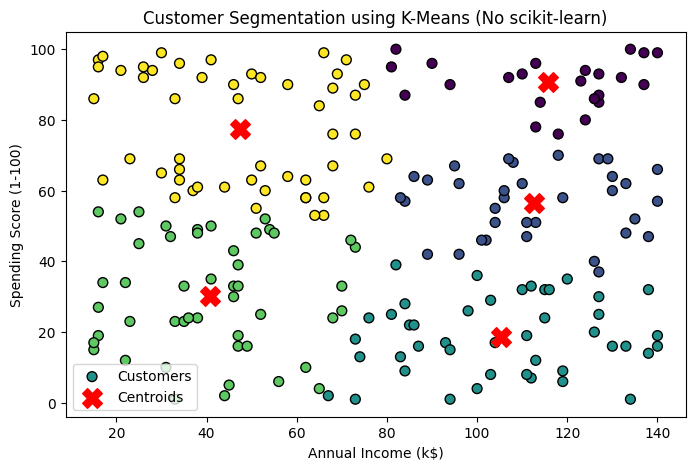

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial.distance import cdist

# For reproducibility
np.random.seed(42)

# Simulate data for 200 customers
n_customers = 200
customer_ids = np.arange(1, n_customers + 1)
ages = np.random.randint(18, 70, size=n_customers)
annual_incomes = np.random.randint(15, 141, size=n_customers)  # in k$
spending_scores = np.random.randint(1, 101, size=n_customers)   # 1-100 scale

# Create a DataFrame (optional, for clarity)
df = pd.DataFrame({
    "CustomerID": customer_ids,
    "Age": ages,
    "Annual Income (k$)": annual_incomes,
    "Spending Score (1-100)": spending_scores
})

# Select features for clustering: Annual Income and Spending Score
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# --- Manual Scaling ---
# Standardize features: (x - mean) / std
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_scaled = (X - X_mean) / X_std

# --- Custom K-Means Functions ---
def initilaze_clut(input_x, k):
    arr = input_x.shape[0]
    indices = np.random.choice(arr, k, replace=False)
    centroids = input_x[indices]
    return centroids

def assign_centroids_x(input_x, centroids):
    distance = cdist(input_x, centroids, metric='euclidean')
    labels = np.argmin(distance, axis=1)
    return labels

def update_centroids(input_x, labels, k):
    centroids = np.array([input_x[labels == i].mean(axis=0) for i in range(k)])
    return centroids

def kmeans(input_x, k, epochs=100, tol=1e-4):
    centroids = initilaze_clut(input_x, k)
    for i in range(epochs):
        old_centroids = centroids.copy()
        labels = assign_centroids_x(input_x, centroids)
        centroids = update_centroids(input_x, labels, k)
        if np.linalg.norm(centroids - old_centroids) < tol:
            print(f"Converged after {i + 1} iterations")
            break
    return centroids, labels

# --- Clustering ---
# Choose the number of clusters (e.g., 5)
optimal_k = 5
centroids, labels = kmeans(X_scaled, optimal_k)

# Optionally, compute the inertia (sum of squared distances)
def compute_inertia(input_x, centroids, labels):
    inertia = 0.0
    for i in range(len(input_x)):
        inertia += np.linalg.norm(input_x[i] - centroids[labels[i]])**2
    return inertia

inertia_value = compute_inertia(X_scaled, centroids, labels)
print("Inertia:", inertia_value)

# Transform centroids back to original scale for visualization
centroids_original = centroids * X_std + X_mean

# --- Visualization ---
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolors='k', s=50, label='Customers')
plt.scatter(centroids_original[:, 0], centroids_original[:, 1], marker='X', s=200, color='red', label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation using K-Means (No scikit-learn)')
plt.legend()
plt.show()


Converged after 18 iterations


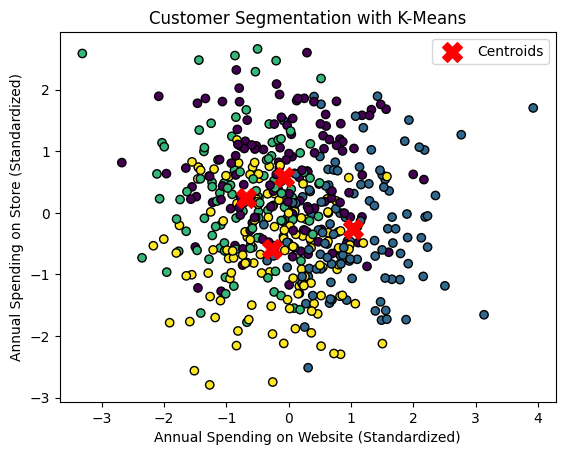

New customer belongs to cluster: 1


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

np.random.seed(42)

# Simulate customer features (Annual Spending on Website, Spending on Store, Transactions, Loyalty Score)
customers = np.column_stack((
    np.random.normal(loc=500, scale=100, size=500),  # Spending on Website ($)
    np.random.normal(loc=600, scale=120, size=500),  # Spending on Store ($)
    np.random.randint(10, 100, size=500),            # Transactions per Year
    np.random.randint(1, 100, size=500)              # Loyalty Score (1-100)
))

# Standardize data
customers = (customers - customers.mean(axis=0)) / customers.std(axis=0)

def initialize_clusters(data, k):
    indices = np.random.choice(data.shape[0], k, replace=False)
    return data[indices]

def assign_clusters(data, centroids):
    distances = cdist(data, centroids, metric='euclidean')
    return np.argmin(distances, axis=1)

def update_centroids(data, labels, k):
    return np.array([data[labels == i].mean(axis=0) for i in range(k)])

def kmeans_clustering(data, k, epochs=100, tol=1e-4):
    centroids = initialize_clusters(data, k)
    
    for i in range(epochs):
        old_centroids = centroids.copy()
        labels = assign_clusters(data, centroids)
        centroids = update_centroids(data, labels, k)
        
        if np.linalg.norm(centroids - old_centroids) < tol:
            print(f"Converged after {i + 1} iterations")
            break
    
    return centroids, labels

# Run K-Means with k=4 clusters
k = 4
centroids, labels = kmeans_clustering(customers, k)

# Plot results
plt.scatter(customers[:, 0], customers[:, 1], c=labels, cmap='viridis', edgecolors='k')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='red', label='Centroids')
plt.xlabel("Annual Spending on Website (Standardized)")
plt.ylabel("Annual Spending on Store (Standardized)")
plt.legend()
plt.title("Customer Segmentation with K-Means")
plt.show()

def predict_cluster(new_customer, centroids):
    distances = cdist([new_customer], centroids, metric='euclidean')
    return np.argmin(distances, axis=1)[0]  # Return the closest cluster index

# Standardize new data (using the mean & std from original dataset)
new_customer = np.array([550, 700, 40, 65])
new_customer = (new_customer - customers.mean(axis=0)) / customers.std(axis=0)

# Predict the cluster
predicted_cluster = predict_cluster(new_customer, centroids)
print(f"New customer belongs to cluster: {predicted_cluster}")



In [24]:
# updated version

Converged after 2 iterations. Inertia: 2000.00
Converged after 12 iterations. Inertia: 1611.71
Converged after 10 iterations. Inertia: 1346.16
Converged after 11 iterations. Inertia: 1220.47
Converged after 26 iterations. Inertia: 1046.01
Converged after 16 iterations. Inertia: 967.32
Converged after 30 iterations. Inertia: 883.93
Converged after 13 iterations. Inertia: 834.38
Converged after 17 iterations. Inertia: 777.98
Converged after 14 iterations. Inertia: 735.88


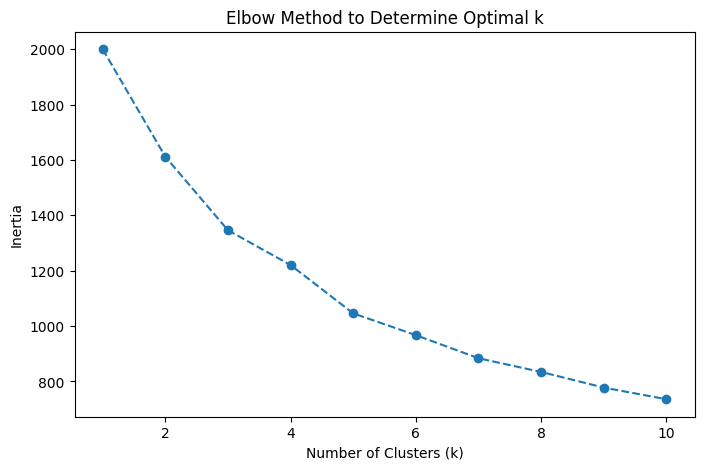

Converged after 19 iterations. Inertia: 1191.31


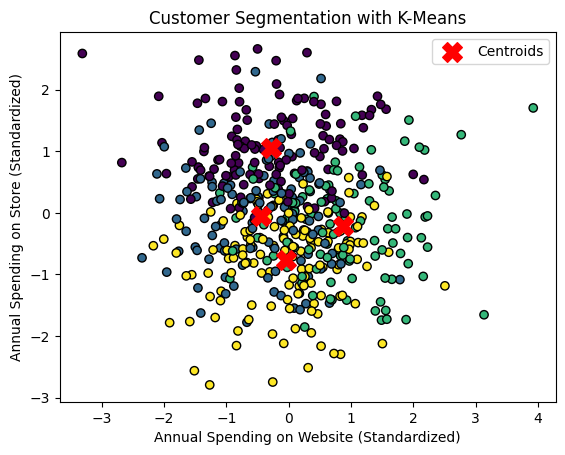

New customer belongs to cluster: 0


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

np.random.seed(42)

# Step 1: Generate Customer Data (Annual Spending, Transactions, Loyalty Score)
customers = np.column_stack((
    np.random.normal(loc=500, scale=100, size=500),  # Spending on Website ($)
    np.random.normal(loc=600, scale=120, size=500),  # Spending on Store ($)
    np.random.randint(10, 100, size=500),            # Transactions per Year
    np.random.randint(1, 100, size=500)              # Loyalty Score (1-100)
))

# Standardize data
customers = (customers - customers.mean(axis=0)) / customers.std(axis=0)

# Step 2: K-Means Implementation
def initialize_clusters(data, k):
    indices = np.random.choice(data.shape[0], k, replace=False)
    return data[indices]

def assign_clusters(data, centroids):
    distances = cdist(data, centroids, metric='euclidean')
    return np.argmin(distances, axis=1)

def update_centroids(data, labels, k):
    return np.array([data[labels == i].mean(axis=0) for i in range(k)])

def compute_inertia(data, centroids, labels):
    return np.sum([np.linalg.norm(data[labels == i] - centroids[i])**2 for i in range(len(centroids))])

def kmeans_clustering(data, k, epochs=100, tol=1e-4):
    centroids = initialize_clusters(data, k)
    for i in range(epochs):
        old_centroids = centroids.copy()
        labels = assign_clusters(data, centroids)
        centroids = update_centroids(data, labels, k)
        inertia = compute_inertia(data, centroids, labels)
        
        if np.linalg.norm(centroids - old_centroids) < tol:
            print(f"Converged after {i + 1} iterations. Inertia: {inertia:.2f}")
            break
    return centroids, labels, inertia

# Step 3: Determine Optimal k using Elbow Method
inertias = []
k_values = range(1, 11)
for k in k_values:
    _, _, inertia = kmeans_clustering(customers, k)
    inertias.append(inertia)

plt.figure(figsize=(8,5))
plt.plot(k_values, inertias, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method to Determine Optimal k")
plt.show()

# Choose optimal k (e.g., k=4 based on elbow method)
k_optimal = 4
centroids, labels, _ = kmeans_clustering(customers, k_optimal)

# Step 4: Plot Clusters
plt.scatter(customers[:, 0], customers[:, 1], c=labels, cmap='viridis', edgecolors='k')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='red', label='Centroids')
plt.xlabel("Annual Spending on Website (Standardized)")
plt.ylabel("Annual Spending on Store (Standardized)")
plt.legend()
plt.title("Customer Segmentation with K-Means")
plt.show()

# Step 5: Predict New Customer Cluster
def predict_cluster(new_customer, centroids):
    distances = cdist([new_customer], centroids, metric='euclidean')
    return np.argmin(distances, axis=1)[0]

# Example New Customer
new_customer = np.array([550, 700, 40, 65])
new_customer = (new_customer - customers.mean(axis=0)) / customers.std(axis=0)

predicted_cluster = predict_cluster(new_customer, centroids)
print(f"New customer belongs to cluster: {predicted_cluster}")


In [1]:
# Grouping customers into segments

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

np.random.seed(42)

# dataset
df = pd.DataFrame(
    {
        "Customer ID":np.arange(1,6),
        "Age":[35,42,28,50,23],
        "Annual Income": [50000,80000,30000,10000,40000],
        "Spending Scores": [65,40,90,20,85],
        "Purchase Freq": [4,2,6,1,5]
    }
).reset_index(drop=True)


# features age and spending scores
X = df[["Age","Spending Scores"]].values

def clust_initial(features, k):
    n_samples = features.shape[0]
    centroids = []

    first_index = np.random.randint(0, n_samples)
    centroids.append(features[first_index])

    for i in range(1,k):
        distance = np.min(cdist(features, np.array(centroids), metric = 'euclidean')**2, axis = 1)
        probs = distance / distance.sum()

        next_index = np.random.choice(n_samples, p=probs)
        centroids.append(features[next_index])
        centroids = np.array(centroids)
    return centroids

def assign(features, k):
    distances = cdist(features, centroids, metric = 'euclidean')
    labels = np.argmin(distances, axis = 1)
    return labels

def update_centroids(features, labels, k):
    return np.array( features[labels == i].mean(axis=0) for i in range(k))

def compute_inertia(features, centroids, labels):
    return np.sum( np.linalg.norm(features[labels == i] - centroids)**2 for i in range(len(centroids)) )
def k_means(features, k, epoch = 100, tol = 1e-4):
    centroids = clust_initial(features, k)

    for i in range(epoch):
        old_cent = centroids.copy()
        labels = assign(features, k)
        centroids = update_centroids(features, labels, k)
        inertia = compute_inertia(features, centroids, labels)

        if np.linalg.norm(centroids - old_cent) < tol:
            print(f"iteratio f {i + 1}")
            break
    return centroids, labels, inertia

k_valu = range(1,11)
inert = []
for k in k_valu:
    _,_,inertia = k_means(X, k)
    inert.append(inertia)

plt.figure(figsize=(8,5))
plt.plot(k_values, inertias, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method to Determine Optimal k")
plt.show()

NameError: name 'centroids' is not defined

Iteration 2
Iteration 2
Iteration 2
Iteration 2
Iteration 1


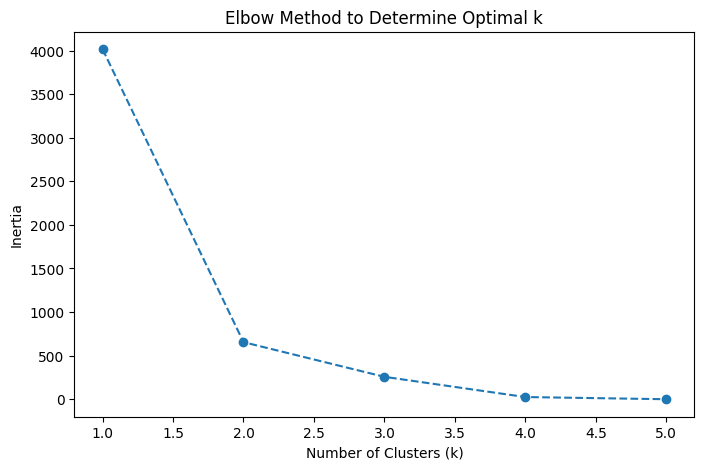

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

np.random.seed(42)

# Dataset
df = pd.DataFrame(
    {
        "Customer ID": np.arange(1, 6),
        "Age": [35, 42, 28, 50, 23],
        "Annual Income": [50000, 80000, 30000, 10000, 40000],
        "Spending Scores": [65, 40, 90, 20, 85],
        "Purchase Freq": [4, 2, 6, 1, 5]
    }
).reset_index(drop=True)

# Features: Age and Spending Scores
X = df[["Age", "Spending Scores"]].values

def clust_initial(features, k):
    n_samples = features.shape[0]
    centroids = []

    first_index = np.random.randint(0, n_samples)
    centroids.append(features[first_index])

    for _ in range(1, k):
        distances = np.min(cdist(features, np.array(centroids), metric='euclidean')**2, axis=1)
        probs = distances / distances.sum()
        next_index = np.random.choice(n_samples, p=probs)
        centroids.append(features[next_index])
        
    return np.array(centroids)

def assign(features, centroids):
    distances = cdist(features, centroids, metric='euclidean')
    labels = np.argmin(distances, axis=1)
    return labels

def update_centroids(features, labels, k):
    return np.array([features[labels == i].mean(axis=0) for i in range(k)])

def compute_inertia(features, centroids, labels):
    return np.sum([np.linalg.norm(features[labels == i] - centroids[i])**2 for i in range(len(centroids))])

def k_means(features, k, epochs=100, tol=1e-4):
    centroids = clust_initial(features, k)

    for i in range(epochs):
        old_centroids = centroids.copy()
        labels = assign(features, centroids)
        centroids = update_centroids(features, labels, k)
        inertia = compute_inertia(features, centroids, labels)

        if np.linalg.norm(centroids - old_centroids) < tol:
            print(f"Iteration {i + 1}")
            break
    return centroids, labels, inertia

# Finding optimal k using the Elbow Method
k_values = range(1, 6)
inertias = []

for k in k_values:
    _, _, inertia = k_means(X, k)
    inertias.append(inertia)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method to Determine Optimal k")
plt.show()


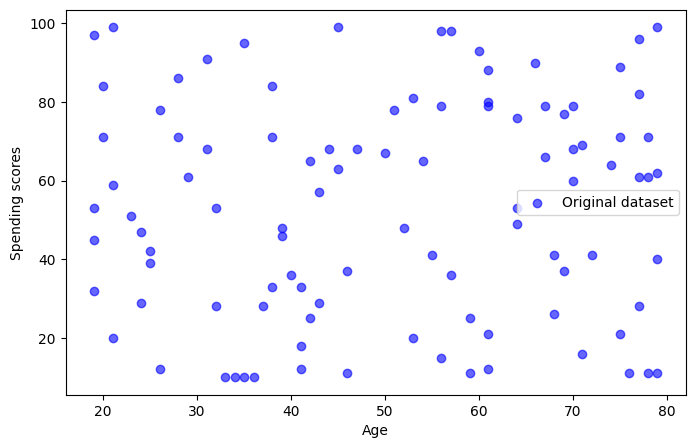

C:\Users\Admin\AppData\Local\Temp\ipykernel_11176\2196043510.py:76: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(np.linalg.norm(data_points[labels == i] - centroids[i])**2 for i in range(len(centroids)))


Iteration 2 
Iteration 6 
Iteration 6 
Iteration 11 
Iteration 8 
Iteration 7 
Iteration 8 
Iteration 7 
Iteration 5 
Iteration 5 


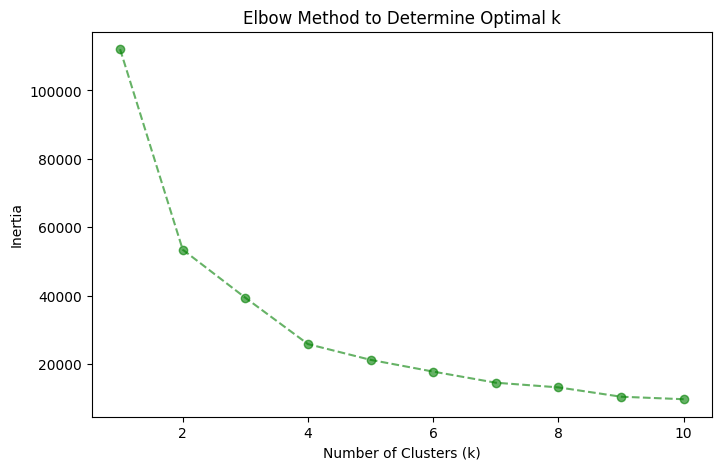

Iteration 6 


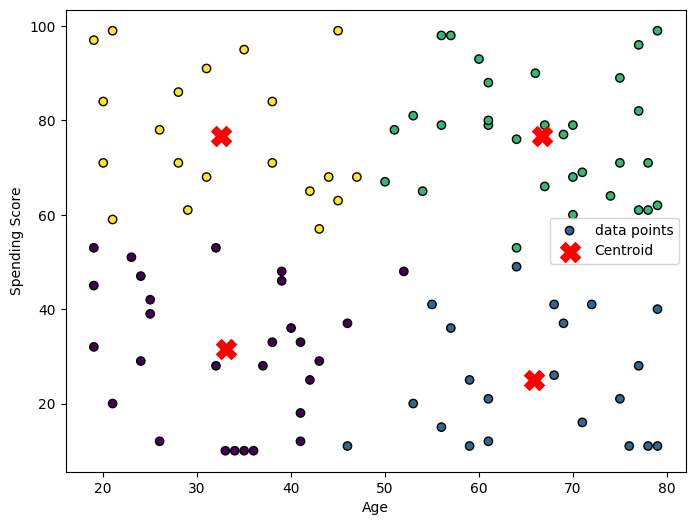

New customer data: [[60 80]]
Assigned cluster: 2


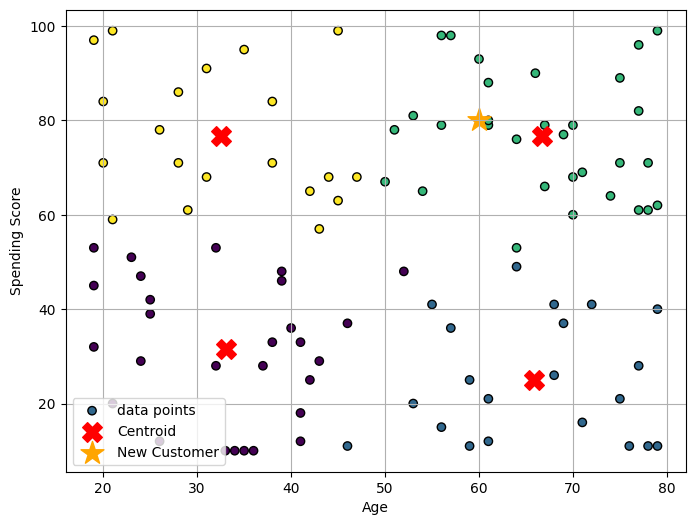

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist


# dataset
np.random.seed(42)
customers = 100

ID = np.arange(1,101)
Age = np.random.randint(18,80, size = customers)
Annual_income = np.random.randint(40000,150000, size = customers)
Spending_scores = np.random.randint(10,101, size = customers)

data = {
    "Cutomer ID": ID,
    "Age": Age,
    "Annual Income": Annual_income,
    "Spending Scores": Spending_scores
}

df = pd.DataFrame.from_dict(data).reset_index(drop=True)

df.head(10)

Features = df[['Age','Spending Scores']].values

# ploting the dataset points

plt.figure(figsize=(8,5))
plt.scatter(Features[:,0], Features[:,1], color = 'blue', alpha = 0.6, label = "Original dataset")
plt.ylabel("Spending scores")
plt.xlabel("Age")
plt.legend()
plt.show()


# initialize the centroids
def cluster_initialization(data_points, k):
    samples = data_points.shape[0]
    centroids = []

    # first centroid
    first_index = np.random.randint(0, samples)
    centroids.append(data_points[first_index])

    # remainig centroids
    for _ in range(1,k):
        distances = np.min(
            cdist(data_points, centroids, metric = 'euclidean')**2, axis = 1
        )
        probabilities = distances / distances.sum()
        next_index = np.random.choice(samples, p = probabilities)
        centroids.append(data_points[next_index])
        
    return np.array(centroids)

# assign centroids
def assigning(data_points, centroids):
    distance = cdist(data_points, centroids, metric = 'euclidean')
    labels = np.argmin(distance, axis = 1)
    return labels

# update the centroids
def updated(data_points, labels, k):
    
    centroids = np.array([
        data_points[labels == i].mean(axis=0) for i in range(k)
    ])
    
    return centroids

# performing elbow method
def elbow(data_points, centroids, labels):
    return np.sum(np.linalg.norm(data_points[labels == i] - centroids[i])**2 for i in range(len(centroids)))

# performing k means
def Kmeans(data_points, k, epochs = 100, tol = 1e-4):
    centroids = cluster_initialization(data_points, k)

    for epoch in range(epochs):
        old_centroids = centroids.copy()
        labels = assigning(data_points, centroids)
        centroids = updated(data_points, labels, k)
        inertia = elbow(data_points, centroids, labels)

        if np.linalg.norm(centroids - old_centroids) < tol:
            print(f"Iteration {epoch+1} ")
            break
    return centroids, labels, inertia

# ceking optimal k
k_values = range(1,11)
inertias = []

for k in k_values:
    _,_,inertia = Kmeans(Features, k)
    inertias.append(inertia)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, marker='o', linestyle='--', color = 'green', alpha = 0.6)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method to Determine Optimal k")
plt.show()      

optimal_k = 4
Centroids, Labels, _ = Kmeans(Features, optimal_k)

# ploting clustres
plt.figure(figsize=(8,6))
plt.scatter(Features[:,0], Features[:,1], c = Labels, cmap = 'viridis', label = 'data points', edgecolors = 'k')
plt.scatter(Centroids[:,0], Centroids[:,1], marker = 'X', color = 'red', s = 200, label = "Centroid")
plt.ylabel("Spending Score")
plt.xlabel("Age")
plt.legend()
plt.show()

# predicting new customer

new_customer = np.array([[60, 80]])

# Predict the cluster for the new customer
new_customer_cluster = assigning(new_customer, Centroids)
print("New customer data:", new_customer)
print("Assigned cluster:", new_customer_cluster[0])

plt.figure(figsize=(8,6))
plt.scatter(Features[:,0], Features[:,1], c = Labels, cmap = 'viridis', label = 'data points', edgecolors = 'k')
plt.scatter(Centroids[:,0], Centroids[:,1], marker = 'X', color = 'red', s = 200, label = "Centroid")
plt.scatter(new_customer[0,0], new_customer[0,1], marker='*', color='orange', s=300, label='New Customer')
plt.ylabel("Spending Score")
plt.xlabel("Age")
plt.legend()
plt.grid(True)
plt.show()


In [50]:
# predicting if the customer will churn or not

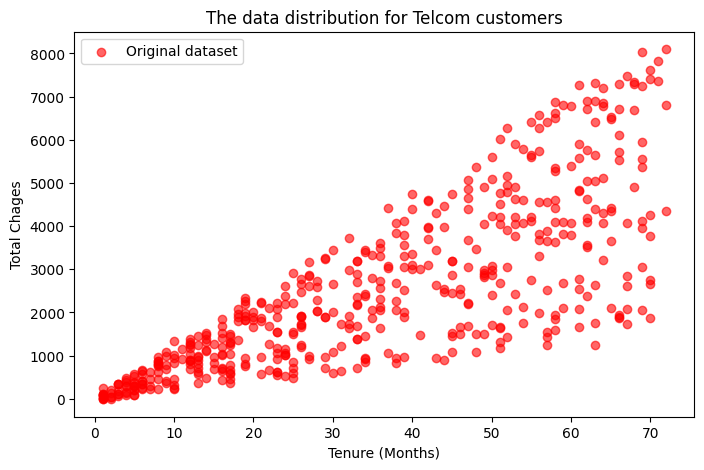

Converge after 2
Converge after 8
Converge after 11
Converge after 8
Converge after 10
Converge after 37
Converge after 15
Converge after 15
Converge after 19
Converge after 12


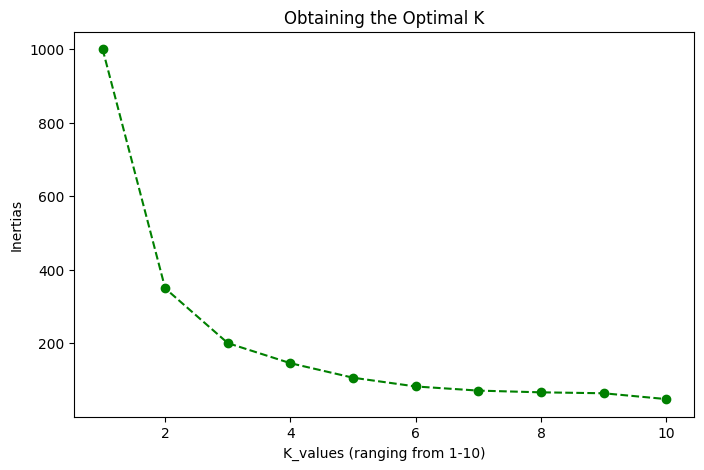

Converge after 4


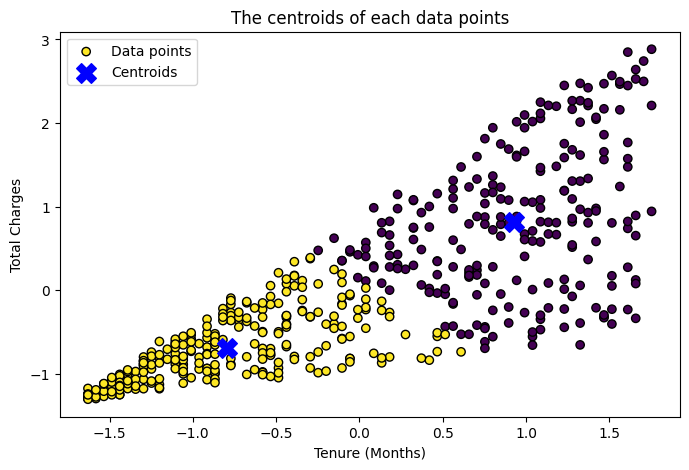

   Cluster     churn
0        0  0.177489
1        1  0.408922
Assigned cluster: 1


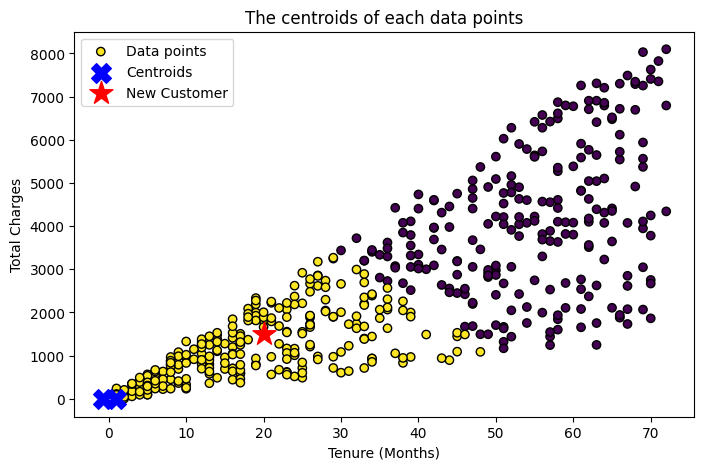

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

np.random.seed(42)

# dataset of telecom customers
Telcom_customer = 500

CustomerID = np.arange(1, (Telcom_customer + 1))
Age = np.random.randint(18, 80, size = Telcom_customer)
Tenure = np.random.randint(1, 73, size = Telcom_customer)
MonthlyCharges = np.random.uniform(20, 120, size = Telcom_customer)
TotalChrages = (MonthlyCharges * Tenure) + np.random.normal(loc = 0, scale = 50, size = Telcom_customer)
SupportCalls = np.random.poisson(2, size = Telcom_customer)
churn = ( (SupportCalls > np.random.randint(2,5, size = Telcom_customer)) | (Tenure < 12)).astype(int)

sample_dataset = {
    "CustomerID" : CustomerID,
    "Age" : Age,
    "Tenure": Tenure,
    "Monthly Charges": MonthlyCharges,
    "Total Chrages": TotalChrages,
    "Support Calls": SupportCalls,
    "churn" : churn
}

dataframe = pd.DataFrame.from_dict(sample_dataset)
X_features = dataframe[['Tenure','Total Chrages']].values

# visulaize the data
plt.figure(figsize=(8,5))
plt.scatter(X_features[:,0], X_features[:,1], color = "red", alpha = 0.6, label = "Original dataset")
plt.title("The data distribution for Telcom customers")
plt.ylabel("Total Chages")
plt.xlabel("Tenure (Months)")
plt.legend()
plt.show()


# scaling 
def scaling(X):
    mean_x = np.mean(X, axis = 0)
    std_x = np.std(X, axis = 0)
    std_x = np.where(std_x == 0, 1e-6, std_x)
    scaled = (X - mean_x) / std_x
    return mean_x, std_x, scaled

mean_x, std_x, scaled_data = scaling(X_features)
X_normaized_features = scaled_data

# define clusters
def initialize_clusters(X_normaized, k):
    no_samples = X_normaized.shape[0]
    centroids = []

    fisrt_index = np.random.randint(0, no_samples)
    centroids.append(X_normaized[fisrt_index])

    for _ in range(1,k):
        distance = np.min(cdist(X_normaized, centroids, metric = 'euclidean')**2, axis = 1)
        probability = distance / distance.sum()
        next_index = np.random.choice(no_samples, p = probability)
        centroids.append(X_normaized[next_index])
        
    return np.array(centroids)
        

# assign the centroids
def assigne_centroids(X_normaized, centroids):
    distance = cdist(X_normaized, centroids, metric = 'euclidean')
    labels = np.argmin(distance, axis = 1)
    return labels

# update the centroids
def update_clusters(X_normaized, labels, k):
    centroids = np.array([X_normaized[labels == i].mean(axis = 0) for i in range(k)])
    return centroids

# elbow
def elbow_calculation(X_normaized, labels, centroids):
    result = np.sum([np.linalg.norm(X_normaized[labels == i] - centroids[i])**2 for i in range(len(centroids))])
    return result

# kmeans
def KMeans(X_normaized, k, epochs = 100, tol = 1e-4):
    centroids = initialize_clusters(X_normaized, k)

    for epoch in range(epochs):
        old_centroids = centroids.copy()
        labels = assigne_centroids(X_normaized, centroids)
        centroids = update_clusters(X_normaized, labels, k)
        inertia = elbow_calculation(X_normaized, labels, centroids)

        if np.linalg.norm(centroids - old_centroids) < tol:
            print(f"Converge after {epoch + 1}")
            break
    return labels, centroids, inertia

# obtaining optimal k
K_values = range(1, 11)
inertias = []
for k in K_values:
    _,_,inertia = KMeans(X_normaized_features, k)
    inertias.append(inertia)

# ploting the inertia
plt.figure(figsize=(8,5))
plt.plot(K_values, inertias, marker = 'o', linestyle = '--', color = 'green')
plt.title("Obtaining the Optimal K")
plt.ylabel("Inertias")
plt.xlabel("K_values (ranging from 1-10)")
plt.show()

Optimal_k = 2
Labels, Centroids,_inertia = KMeans(X_normaized_features, Optimal_k)


# ploting the clusters
plt.figure(figsize = (8,5))
plt.scatter(X_normaized_features[:,0], X_normaized_features[:,1], cmap = 'viridis', c = Labels, edgecolor = 'k', label = "Data points")
plt.scatter(Centroids[:,0], Centroids[:,1], marker = "X", s = 200, color = 'blue', label = "Centroids")
plt.title("The centroids of each data points")
plt.xlabel("Tenure (Months)")
plt.ylabel("Total Charges")
plt.legend()
plt.show()

# predicting the new customer
new_customer = np.array([[20, 1500]])

# Scale the new customer data using the same parameters from the training set
new_customer_scaled = (new_customer - mean_x) / std_x

new_customer_cluster = assigne_centroids(new_customer_scaled, Centroids)

dataframe["Cluster"] =  Labels
cluster_summary = dataframe.groupby('Cluster')['churn'].mean().reset_index()
print(cluster_summary)
print("Assigned cluster:", new_customer_cluster[0])

# ploting its cluster

plt.figure(figsize = (8,5))
plt.scatter(X_features[:,0], X_features[:,1], cmap = 'viridis', c = Labels, edgecolor = 'k', label = "Data points")
plt.scatter(Centroids[:,0], Centroids[:,1], marker = "X", s = 200, color = 'blue', label = "Centroids")
# new customer
plt.scatter(new_customer[0,0], new_customer[0,1], marker = '*', s = 300, color = 'red', label = 'New Customer')
plt.title("The centroids of each data points")
plt.xlabel("Tenure (Months)")
plt.ylabel("Total Charges")
plt.legend()



plt.show()


In [99]:
# categorizing employees behaviour if they will leave or not

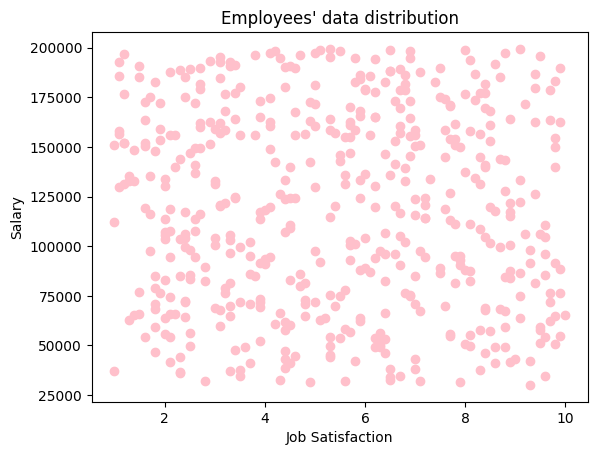

Converge after 2 iterations
Converge after 12 iterations
Converge after 26 iterations
Converge after 17 iterations
Converge after 7 iterations
Converge after 14 iterations
Converge after 19 iterations
Converge after 26 iterations
Converge after 15 iterations
Converge after 19 iterations


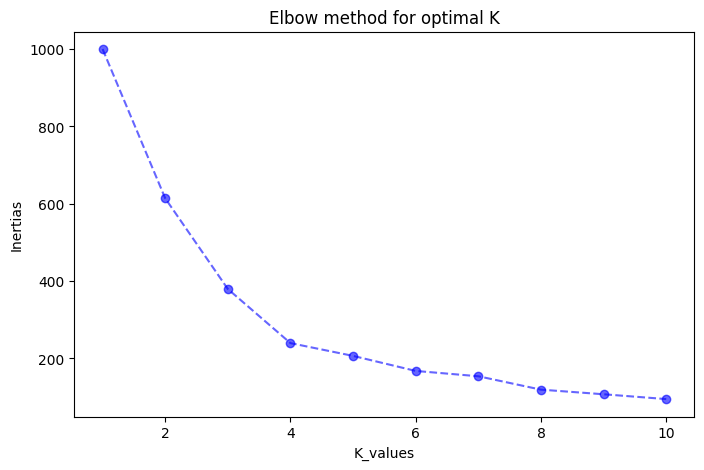

Converge after 20 iterations


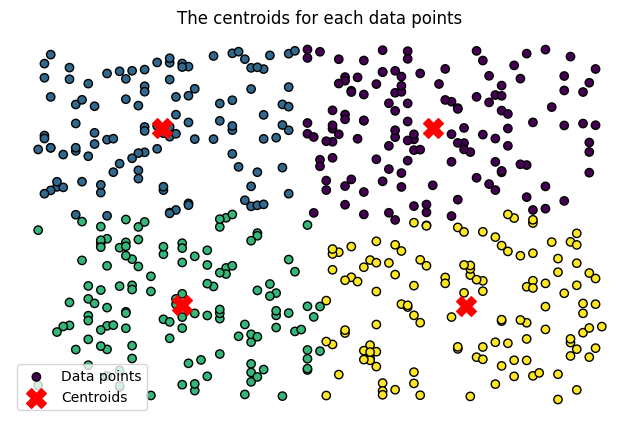

   Clusters  Attrition
0         0   0.000000
1         1   0.088496
2         2   0.203125
3         3   0.087302

The new employee is assigned cluster 2


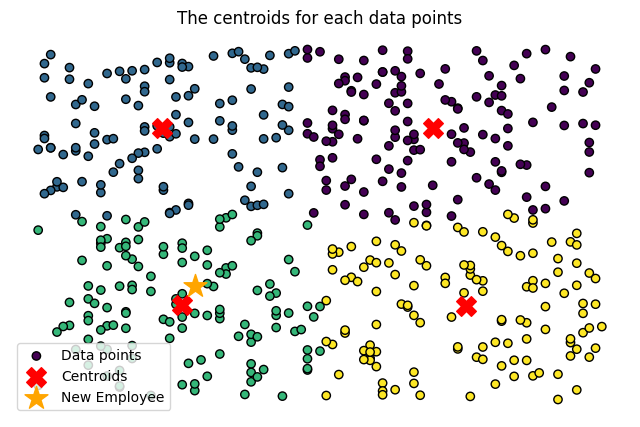

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

np.random.seed(42)

# dataset
employees = 500

EmployeeId = np.arange(1, employees+1)
Age = np.random.randint(20, 65, size = employees)
Department = np.random.choice(["Sales","HR","Engineering","Marketing","Finance"], size = employees)
Salary = np.random.randint(30000, 200000, size = employees)
YearsAtCompany = np.random.randint(0,31, size = employees)
JobSatisfaction = np.round(np.random.uniform(1,10, size = employees), 1)

# attrition rule
Attrition = (
    ((JobSatisfaction < 4) & (YearsAtCompany < 5)) | (Salary < 40000)
).astype(int)

employe_dataset = {
    "EmployeeId" : EmployeeId,
    "Age" : Age,
    "Department" : Department,
    "Salary" : Salary,
    "Years At Company": YearsAtCompany,
    "JobSatisfaction" : JobSatisfaction,
    "Attrition" : Attrition
}

df_employee = pd.DataFrame.from_dict(employe_dataset)
employye_features = df_employee[['JobSatisfaction','Salary']].values

# visualize the data
plt.scatter(employye_features[:,0], employye_features[:,1], label = "Original dataset", color = 'pink', alpha = 1)
plt.title("Employees' data distribution")
plt.ylabel("Salary")
plt.xlabel("Job Satisfaction")
plt.show()

# scaling data
def normalize(data):
    mean_data = np.mean(data, axis = 0)
    std_data = np.std(data, axis = 0)
    eps = 1e-6
    std_data = np.where(std_data == 0, eps, std_data)
    scaled_data = (data - mean_data) / std_data
    return mean_data, std_data, scaled_data

mean_data, std_data, normalized_data = normalize(employye_features)
X_scaled = normalized_data

# intialize clusters using kmeans ++
def clusters_initialization(x, k):
    samples = x.shape[0]
    centroids = []

    first_index = np.random.randint(0, samples)
    centroids.append(x[first_index])

    for _ in range(1,k):
        distance = np.min( cdist(x, centroids, metric = 'euclidean')**2, axis = 1)
        probs = distance / distance.sum()
        next_index = np.random.choice(samples, p=probs)
        centroids.append(x[next_index])
        
    return np.array(centroids)

# assign centroids
def assign_Centroids(x, centroids):
    distances = cdist(x, centroids, metric = 'euclidean')
    labels = np.argmin(distances, axis = 1)
    return labels

# update centroids
def centroids_update(x, labels, k):
    centroids = np.array([ x[labels == i].mean(axis = 0) for i in range(k) ])
    return centroids

# optimal k
def elbow_compute(x, centroids, labels):
    result = np.sum([ np.linalg.norm(x[labels == i] - centroids[i])**2 for i in range(len(centroids)) ])
    return result

# kmeans
def K_Means(x, k, epoch = 200, tol = 1e-4):
    centroids = clusters_initialization(x, k)

    for e in range(epoch):
        old_centroids = centroids.copy()
        labels = assign_Centroids(x, centroids)
        centroids = centroids_update(x, labels, k)
        inertia = elbow_compute(x, centroids, labels)

        if np.linalg.norm(centroids - old_centroids) < tol:
            print(f"Converge after {e + 1} iterations")
            break

    return centroids, labels, inertia


# ploting the elbow for k optimal
k_values = range(1,11)
Inertias = []

for k in k_values:
    _,_, inertia = K_Means(X_scaled, k)
    Inertias.append(inertia)

# plot
plt.figure(figsize=(8,5))
plt.plot(k_values, Inertias, marker = 'o', linestyle = '--', color = 'blue', alpha = 0.6)
plt.title("Elbow method for optimal K")
plt.ylabel("Inertias")
plt.xlabel("K_values")
plt.show()

optimalK = 4
Centroids, Labels, _ = K_Means(X_scaled, optimalK)

# ploting the clusters
plt.figure(figsize=(8,5))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c = Labels, cmap = 'viridis', edgecolor = 'k', label = "Data points")
plt.scatter(Centroids[:,0], Centroids[:,1], marker = 'X', s = 200, color = 'red', label = 'Centroids')
plt.title("The centroids for each data points")
plt.axis("off")
plt.legend()
plt.show()

# new data for plotting
df_employee["Clusters"] = Labels
cluster_summaries = df_employee.groupby('Clusters')['Attrition'].mean().reset_index()
print(cluster_summaries)


# Sample new employee data for prediction
new_employee_data = {
    "EmployeeID": [301],
    "Age": [35],
    "Department": ["Engineering"],
    "Salary": [85000],
    "YearsAtCompany": [3],
    "JobSatisfaction": [3.5]
}

new_employee_df = pd.DataFrame(new_employee_data)

new_features = new_employee_df[['JobSatisfaction','Salary']].values

new_features_scaled = (new_features - mean_data) / std_data

new_features_clusterd = assign_Centroids(new_features_scaled, Centroids)
print(f"\nThe new employee is assigned cluster {new_features_clusterd[0]}")


# ploting the new employee
plt.figure(figsize=(8,5))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c = Labels, cmap = 'viridis', edgecolor = 'k', label = "Data points")
plt.scatter(Centroids[:,0], Centroids[:,1], marker = 'X', s = 200, color = 'red', label = 'Centroids')
plt.scatter(new_features_scaled[0,0], new_features_scaled[0,1], marker = '*', s = 300, color = 'orange', label = "New Employee")
plt.title("The centroids for each data points")
plt.axis("off")
plt.legend()
plt.show()

In [2]:
#E-Comerce Customer Segementation

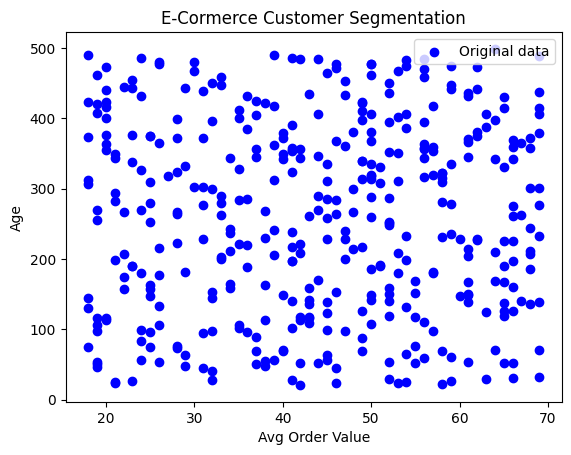

Convrge after 2 iterations
Convrge after 8 iterations
Convrge after 9 iterations
Convrge after 15 iterations
Convrge after 16 iterations
Convrge after 10 iterations
Convrge after 29 iterations
Convrge after 10 iterations
Convrge after 17 iterations
Convrge after 12 iterations


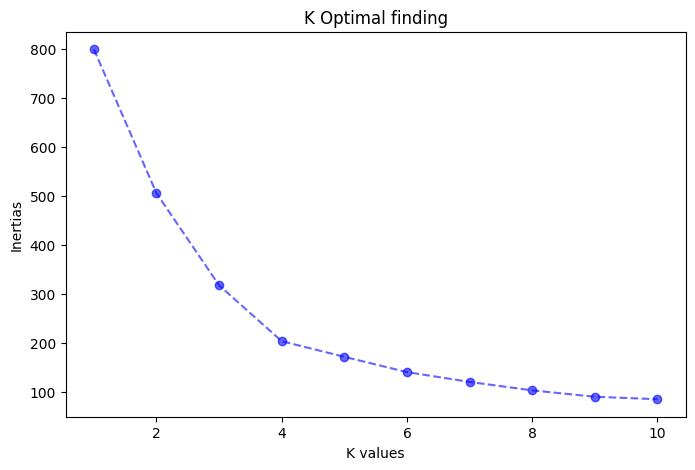

Convrge after 15 iterations


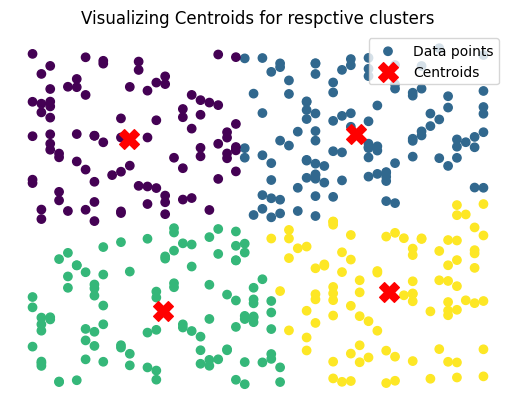

   Clusters  Avg Order Value
0         0       369.294236
1         1       376.293692
2         2       124.666363
3         3       151.943993

New customer will belong to cluster 2


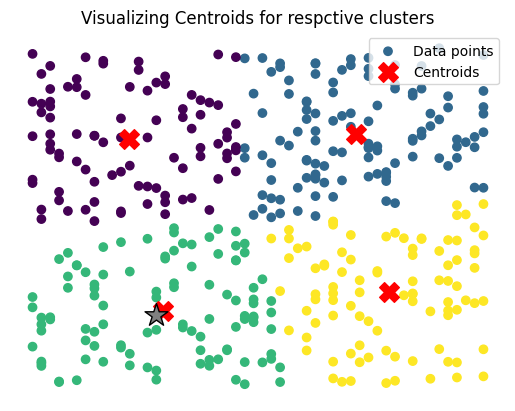

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

np.random.seed(42)

# dataset
No_customers = 400

CustomerID = np.arange(1, No_customers + 1)
Age = np.random.randint(18, 70, size = No_customers)
AnnualIncome = np.random.randint(25000, 200000, size = No_customers)
PurchasedFreq = np.random.poisson(5, size = No_customers) + 1
AvgOrderValue = np.random.uniform(20, 500, size = No_customers)

customer_dict = {
    "CustomerID" : CustomerID,
    "Age" : Age,
    "Annual Income" : AnnualIncome,
    "Purchased Frequency" : PurchasedFreq,
    "Avg Order Value" : AvgOrderValue
}

dataset = pd.DataFrame.from_dict(customer_dict)
Input_features = dataset[['Age','Avg Order Value']].values

# ploting
plt.scatter(Input_features[:,0], Input_features[:,1], color = 'blue', marker = 'o', label = 'Original data')
plt.title("E-Cormerce Customer Segmentation")
plt.ylabel("Age")
plt.xlabel("Avg Order Value")
plt.legend()
plt.show()

# def scaling
def scaling(customers):
    mean = np.mean(customers, axis = 0)
    std = np.std(customers, axis = 0)
    std = np.where(std == 0, 1e-6, std)
    scaled = (customers - mean) / std
    return scaled, mean, std

# normalizing the data
Customers, mean, std =  scaling(Input_features)
Customers_scaled = Customers

# initialize clusters
def custers_initialized(data, k):
    Samples = data.shape[0]
    centroids = []
    
    first_index = np.random.randint(0, Samples)
    centroids.append(data[first_index])

    for _ in range(1, k):
        distances = np.min(cdist(data, centroids)**2, axis = 1)
        probability = distances / distances.sum()
        next_index = np.random.choice(Samples, p=probability)
        centroids.append(data[next_index])

    return np.array(centroids)


# assign
def assigned_clusters(data, centroids):
    distance = cdist(data, centroids, metric = 'euclidean')
    labels = np.argmin(distance, axis = 1)
    return labels

# update
def update_centroids(data, labels, k):
    centroids = np.array([ data[labels == i].mean(axis = 0) for i in range(k) ])
    return centroids

# perfrming 'elbow mwthod'
def Elbow_method(data, labels, centroids):
    result = np.sum( [ np.linalg.norm(data[labels == i] - centroids[i])**2 for i in range(len(centroids)) ] )
    return result

# kmeans
def K_Means(data, k, epochs = 100, tol = 1e-4):
    centroids = custers_initialized(data, k)

    for epoch in range(epochs):
        old_centroids = centroids.copy()
        labels = assigned_clusters(data, centroids)
        centroids = update_centroids(data, labels, k)
        inertia = Elbow_method(data, labels, centroids)

        if np.linalg.norm(centroids - old_centroids) < tol:
            print(f"Convrge after {epoch + 1} iterations")
            break

    return centroids, labels, inertia


# performing k optimal
KValues = range(1,11)
inertias = []

for k in KValues:
    _,_, inertia = K_Means(Customers_scaled, k)
    inertias.append(inertia)

# ploting
plt.figure(figsize = (8,5))
plt.plot(KValues, inertias, color = 'blue', alpha = 0.6, marker = 'o', linestyle = '--')
plt.title("K Optimal finding")
plt.ylabel("Inertias")
plt.xlabel("K values")
plt.show()

K_optimal = 4
centroids, labels, _ = K_Means(Customers_scaled, K_optimal)


# ploting the clusters
plt.scatter(Customers_scaled[:,0], Customers_scaled[:,1], cmap = 'viridis', c=labels, label = "Data points")
plt.scatter(centroids[:,0], centroids[:,1], marker = 'X', color = 'red', s = 200, label = 'Centroids')
plt.title("Visualizing Centroids for respctive clusters")
plt.axis('off')
plt.legend()
plt.show()

# new data
dataset['Clusters'] = labels

cluster_summary = dataset.groupby('Clusters')['Avg Order Value'].mean().reset_index()
print(cluster_summary)

new_customer = [[32,120]]
scaled_data = (new_customer - mean) / std
clusterd_customer = assigned_clusters(scaled_data, centroids)
print(f"\nNew customer will belong to cluster {clusterd_customer[0]}")

# ploting the new customer
plt.scatter(Customers_scaled[:,0], Customers_scaled[:,1], cmap = 'viridis', c=labels, label = "Data points")
plt.scatter(centroids[:,0], centroids[:,1], marker = 'X', color = 'red', s = 200, label = 'Centroids')
plt.scatter(scaled_data[0,0], scaled_data[0,1], marker = "*", s = 300, color = 'gray', edgecolor = 'k')
plt.title("Visualizing Centroids for respctive clusters")
plt.axis('off')
plt.legend()
plt.show()

In [47]:
# credit risk assesment

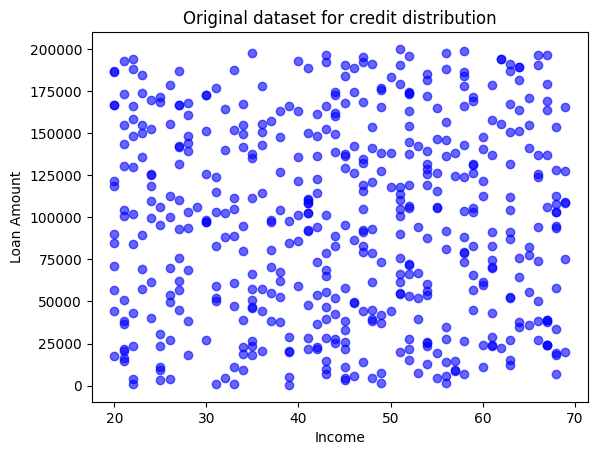

Converged after 2 iterations
Converged after 16 iterations
Converged after 18 iterations
Converged after 24 iterations
Converged after 24 iterations
Converged after 14 iterations
Converged after 32 iterations
Converged after 28 iterations
Converged after 14 iterations
Converged after 20 iterations


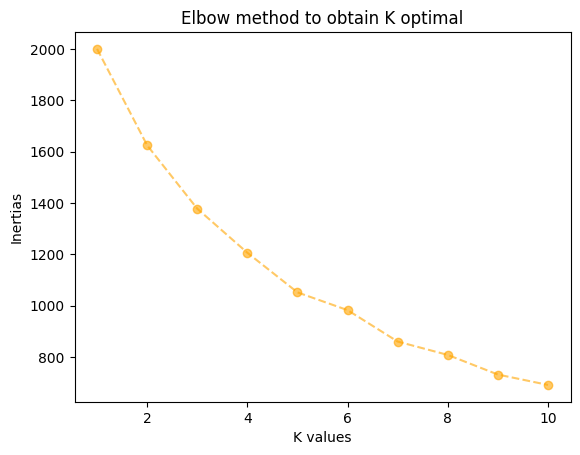

Converged after 30 iterations


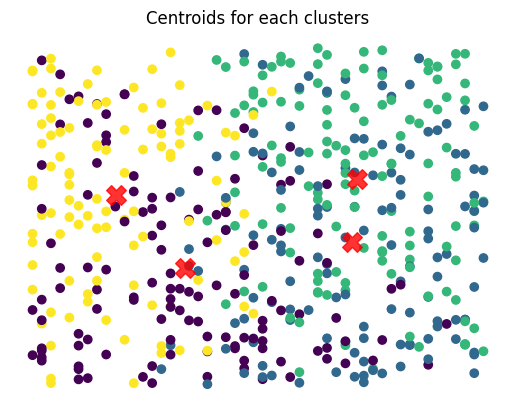

   Clusters      Risk
0         0  0.566929
1         1  0.992366
2         2  0.386861
3         3  0.809524
The applicant is aigned cluster 0 which means, there is no Risk


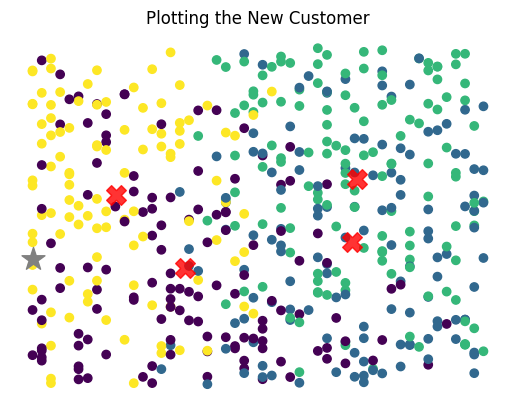

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

np.random.seed(42)
# credit risk assesment
ApplicatiAons = 500

ApplicationID = np.arange(1, ApplicatiAons + 1)
Age = np.random.randint(20,70, size = ApplicatiAons)
Income = np.random.randint(30, 200000, size = ApplicatiAons)
LoanAmount = np.random.randint(5000, 50000, size = ApplicatiAons)
CreditScore = np.random.randint(300, 850, size = ApplicatiAons)
YearsEmployment = np.random.randint(0, 30, size = ApplicatiAons)

Risk = (
    ((CreditScore < 600) | (Income < 50000)) | (YearsEmployment < 2)
).astype(int)

credit_data = {
    "Application ID" : ApplicationID,
    "Age" : Age,
    "Income" : Income,
    "LoanAmount" : LoanAmount,
    "CreditScore" : CreditScore,
    "YearsEmployment" : YearsEmployment,
    "Risk" : Risk
}

credit_df = pd.DataFrame.from_dict(credit_data)

credit_features = credit_df[['Age','Income','CreditScore','LoanAmount']].values
# plot
plt.scatter(credit_features[:,0], credit_features[:,1], color = 'blue', alpha = 0.6, label = "Original dataset")
plt.title("Original dataset for credit distribution")
plt.ylabel("Loan Amount")
plt.xlabel("Income")
plt.show()

# normalize
def normalize(credit):
    mean_credit = np.mean(credit, axis = 0)
    std_credit = np.std(credit, axis = 0)
    std_credit = np.where(std_credit == 0, 1e-6, std_credit)
    scaled = (credit - mean_credit) / std_credit
    return scaled, mean_credit, std_credit

credits, mean_credit, std_credit = normalize(credit_features)
Credits_scaled = credits


# intialize
def intialize(feature, k):
    examples = feature.shape[0]
    centroids = []

    first_index = np.random.randint(0, examples)
    centroids.append(feature[first_index])

    for _ in range(1, k):
        distances = np.min(cdist(feature, centroids, metric = 'euclidean')**2, axis = 1)
        probs = distances / distances.sum()
        next_index = np.random.choice(examples, p=probs)
        centroids.append(feature[next_index])

    return np.array(centroids)

# assign
def cluster_assigning(feature, centroids):
    distance = cdist(feature, centroids, metric = 'euclidean')
    labels = np.argmin(distance, axis = 1)
    return labels

# updating
def update_centroids(feature, labels, k):
    centroids = np.array([feature[labels == i].mean(axis = 0) for i in range(k)])
    return centroids

# koptimal
def K_optimal(feature, labels, centroids):
    results = np.sum( [np.linalg.norm(feature[labels == i] - centroids[i])**2 for i in range(len(centroids))] )
    return results

# kmeans
def Kmeans(feature, k, epoch = 100, tol = 1e-4):
    centroids = intialize(feature, k)

    for e in range(epoch):
        Old_Centroids = centroids
        labels = cluster_assigning(feature, centroids)
        centroids = update_centroids(feature, labels, k)
        inertia = K_optimal(feature, labels, centroids)

        if np.linalg.norm(centroids - Old_Centroids) < tol:
            print(f"Converged after {e + 1} iterations")
            break

    return centroids, labels, inertia

# ploting elbow
kvalues = range(1,11)
Inertias = []
for k in kvalues:
    _,_, inertia = Kmeans(Credits_scaled, k)
    Inertias.append(inertia)

# ploting
plt.plot(kvalues, Inertias, color = 'orange', alpha = 0.6, marker = 'o', linestyle = '--')
plt.title("Elbow method to obtain K optimal")
plt.ylabel("Inertias")
plt.xlabel("K values")
plt.show()

Optimal_K = 4
Current_centroids, Curreent_labels, _ = Kmeans(Credits_scaled, Optimal_K)

# ploting clusters
plt.scatter(Credits_scaled[:,0], Credits_scaled[:,1], c = Curreent_labels, cmap = 'viridis', label = 'Dataset')
plt.scatter(Current_centroids[:,0], Current_centroids[:,1], marker = 'X', s=200, color = 'red',alpha = 0.8, label = 'Centroids')
plt.title("Centroids for each clusters")
plt.axis("off")
plt.show()

# cheking which clusters determine risk
credit_df['Clusters'] = Curreent_labels
summary = credit_df.groupby('Clusters')['Risk'].mean().reset_index()
print(summary)

# new data
new_data = [[20,75000, 15000,30]]
new_scaled_data = (new_data - mean_credit) / std_credit
new_clusterd_data = cluster_assigning(new_scaled_data, Current_centroids)

print(f"The applicant is aigned cluster {new_clusterd_data[0]} which means, there is no Risk")

plt.scatter(Credits_scaled[:,0], Credits_scaled[:,1], c = Curreent_labels, cmap = 'viridis', label = 'Dataset')
plt.scatter(Current_centroids[:,0], Current_centroids[:,1], marker = 'X', s=200, color = 'red',alpha = 0.8, label = 'Centroids')
plt.scatter(new_scaled_data[0,0], new_scaled_data[0,1], marker = '*', s = 300, color = 'gray', label = "New feature")
plt.title("Plotting the New Customer")
plt.axis("off")
plt.show()


In [1]:
# fraud detection

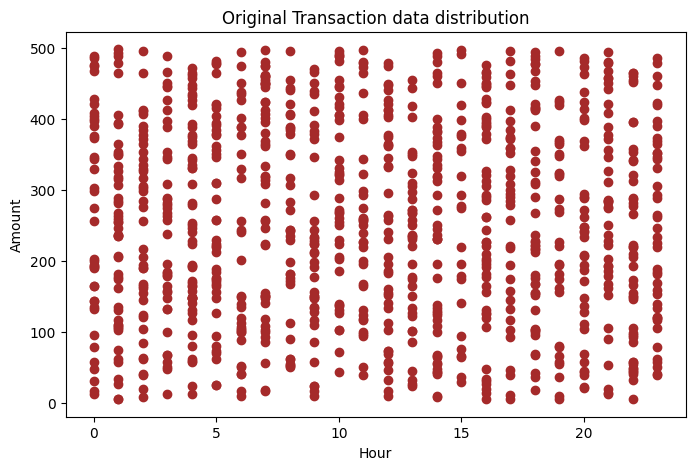

C:\Users\Admin\AppData\Local\Temp\ipykernel_8372\3658546142.py:89: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  results = np.sum(np.linalg.norm(X[labels ==i] - centroids[i])**2 for i in range(len(centroids)))


Converge after 2 iterations
Converge after 8 iterations
Converge after 7 iterations
Converge after 15 iterations
Converge after 15 iterations
Converge after 23 iterations
Converge after 22 iterations
Converge after 28 iterations
Converge after 19 iterations
Converge after 23 iterations


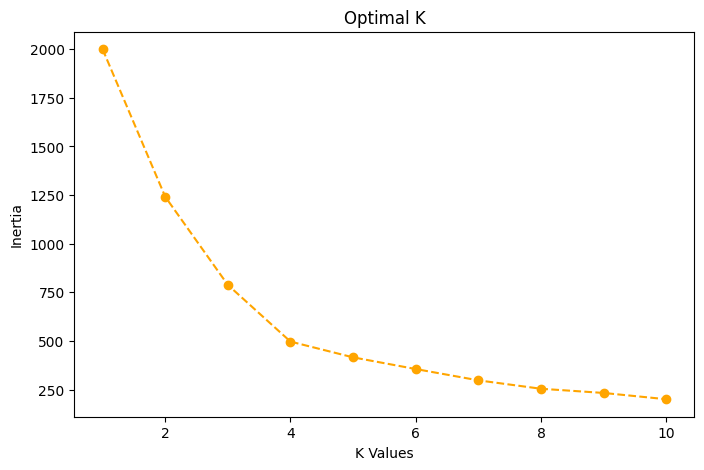

Converge after 11 iterations


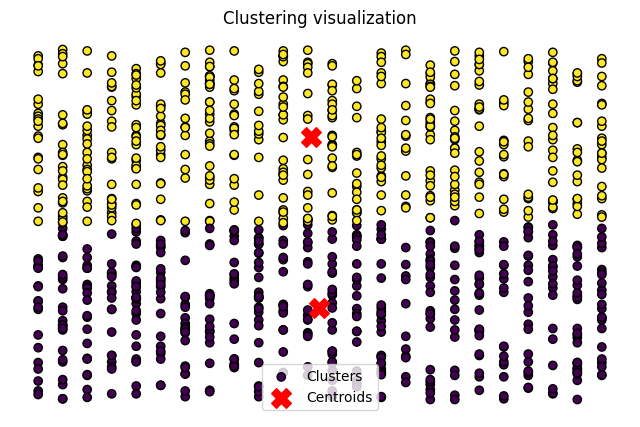

The new transact will be in cluster 1
   Clusters    Status
0         0  0.000000
1         1  0.216162


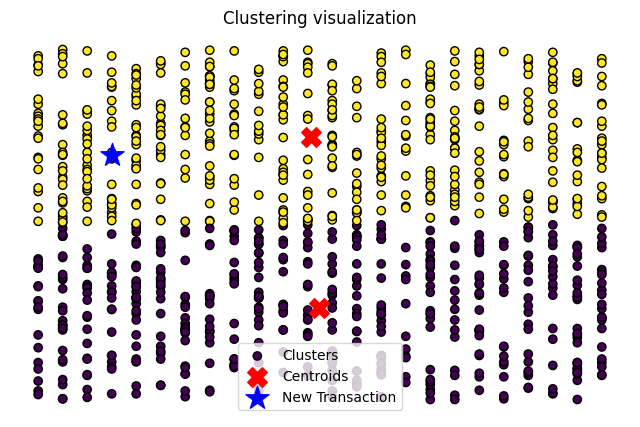

Transaction ID  Amount  Hour MerchantCategory location Status  Clusters
983             984     378     5      Restaurants   City C  Fraud         1
171             172     435     4          Grocery   City A  Fraud         1
268             269     391     5      Electronics   City A  Fraud         1
706             707     306     2      Restaurants   City A  Fraud         1
494             495     346     0      Electronics   City C  Fraud         1
329             330     356     5      Electronics   City B  Fraud         1
69               70     350     5         Clothing   City D  Fraud         1
359             360     308     3      Electronics   City C  Fraud         1
348             349     302     2          Grocery   City A  Fraud         1
86               87     392     4          Grocery   City B  Fraud         1
253             254     467     0      Electronics   City D  Fraud         1
717             718     462     4      Electronics   City B  Fraud         1
263             264     446     3          Grocery   City B  Fraud         1
385             386     344     3      Electronics   City D  Fraud         1
577             578     428     0         Clothing   City A  Fraud         1
517             518     412     3      Electronics   City C  Fraud         1
369             370     308     4      Restaurants   City C  Fraud         1
776             777     407     2         Clothing   City D  Fraud         1
333             334     421     0      Electronics   City A  Fraud         1
613             614     492     1      Electronics   City B  Fraud         1

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

np.random.seed(42)

# dataset
transaction = 1000

TransactionID = np.arange(1, transaction+1)
Amount = np.random.randint(5, 500, size = transaction)
Hour = np.random.randint(0, 24, size = transaction)
MerchantCategory = np.random.choice([
    'Grocery','Electronics','Clothing','Restaurants'
], size = transaction)

location = np.random.choice(['City A','City B','City C','City D'], size = transaction)
Fraud = ((Amount > 300) & (Hour < 6)).astype(int)


sample_data = {
    "Transaction ID" : TransactionID,
    "Amount" : Amount,
    "Hour" : Hour,
    "MerchantCategory": MerchantCategory,
    "location" : location,
    "Status" : Fraud
}


df_transact = pd.DataFrame.from_dict(sample_data)


transact_features = df_transact[['Hour','Amount']].values
# ploting
plt.figure(figsize=(8,5))
plt.scatter(transact_features[:,0], transact_features[:,1], color = "brown", label = "Original data")
plt.title("Original Transaction data distribution")
plt.ylabel("Amount")
plt.xlabel("Hour")
plt.show()
df_transact.sample(10)


# scaling
def scale(datax):
    data_mean = np.mean(datax, axis = 0)
    data_std = np.std(datax, axis = 0)
    data_std = np.where(data_std == 0, 1e-6, data_std)
    normalize = (datax - data_mean) / data_std
    return normalize, data_mean, data_std

# features scaling
transact_data, data_mean, data_std = scale(transact_features)
transact_scaled = transact_data


# clusters initialize
def clusters_define(X, k):
    No_samples = X.shape[0]
    centroids = []
    fisrt_index = np.random.randint(0, No_samples)
    centroids.append(X[fisrt_index])

    # next centriods
    for _ in range(1, k):
        distances = np.min( cdist(X, centroids, metric = 'euclidean'), axis = 1 )
        probability = distances / distances.sum()

        next_index = np.random.choice(No_samples, p=probability)
        centroids.append(X[next_index])

    return np.array(centroids)

# assign
def cluster_assigning(X, centroids):
    distance = cdist(X, centroids, metric = 'euclidean')
    labels = np.argmin(distance, axis = 1)
    return labels

# update
def update(X, k, labels):
    centroids = np.array( [X[labels == i].mean(axis = 0) for i in range(k)] )
    return centroids

# elbow method
def Optimal_K(X, labels, centroids):
    results = np.sum(np.linalg.norm(X[labels ==i] - centroids[i])**2 for i in range(len(centroids)))
    return results

# kmeans
def K_Means(X, k, epoch = 100, tol = 1e-4):
    centroids = clusters_define(X, k)
    
    for e in range(epoch):
        old_centroids = centroids.copy()
        labels = cluster_assigning(X, centroids)
        centroids = update(X, k, labels)
        inertia = Optimal_K(X, labels, centroids)

        if np.linalg.norm(centroids - old_centroids) < tol:
            print(f"Converge after {e + 1} iterations")
            break

    return centroids, labels, inertia

K_values = range(1,11)
Inertias = []

for k in K_values:
    _,_, inertia = K_Means(transact_scaled, k)
    Inertias.append(inertia)

# optimal k
plt.figure(figsize = (8,5))
plt.plot(K_values, Inertias, color = 'orange', linestyle = '--', marker = 'o')
plt.title("Optimal K")
plt.ylabel("Inertia")
plt.xlabel("K Values")
plt.show()
        
Optimal = 2
Centroids, Labels, _ = K_Means(transact_scaled, Optimal)
# ploting clusters
plt.figure(figsize=(8,5))
plt.scatter(transact_scaled[:,0], transact_scaled[:,1], cmap = 'viridis', c = Labels, edgecolor = 'k', label = "Clusters")
plt.scatter(Centroids[:,0], Centroids[:,1], marker = 'X', color = 'red', s = 200, label = "Centroids")
plt.axis("off")
plt.title("Clustering visualization")
plt.legend()
plt.show()

# ploting new data
new_transact = [[3, 350]]
new_transact_scaled = (new_transact - data_mean) / data_std
new_transact_clusterd = cluster_assigning(new_transact_scaled, Centroids)
print(f'The new transact will be in cluster {new_transact_clusterd[0]}')


df_transact['Clusters'] = Labels
summary = df_transact.groupby('Clusters')['Status'].mean().reset_index()
print(summary)

df_transact['Status'] = df_transact['Status'].map({1 : "Fraud", 0 : "Not Fraud"})


# ploting the new transact
plt.figure(figsize=(8,5))
plt.scatter(transact_scaled[:,0], transact_scaled[:,1], cmap = 'viridis', c = Labels, edgecolor = 'k', label = "Clusters")
plt.scatter(Centroids[:,0], Centroids[:,1], marker = 'X', color = 'red', s = 200, label = "Centroids")
plt.scatter(new_transact_scaled[0,0], new_transact_scaled[0,1], marker = '*', s = 300, color = "blue", label = "New Transaction")
plt.axis("off")
plt.title("Clustering visualization")
plt.legend()
plt.show()

df_transact.loc[df_transact['Status'] == 'Fraud'].sample(20)

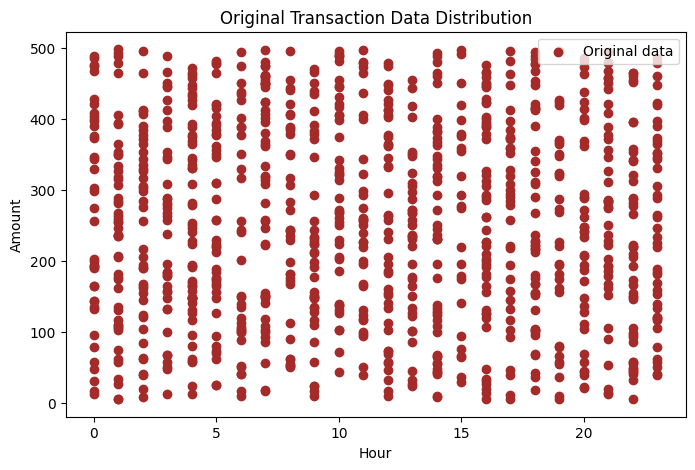

Converged after 2 iterations
Converged after 19 iterations
Converged after 19 iterations
Converged after 10 iterations
Converged after 14 iterations
Converged after 30 iterations
Converged after 11 iterations
Converged after 21 iterations
Converged after 15 iterations
Converged after 20 iterations


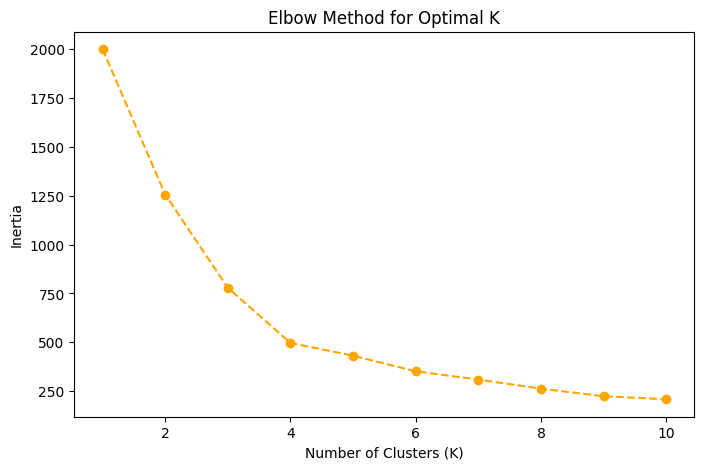

Converged after 8 iterations


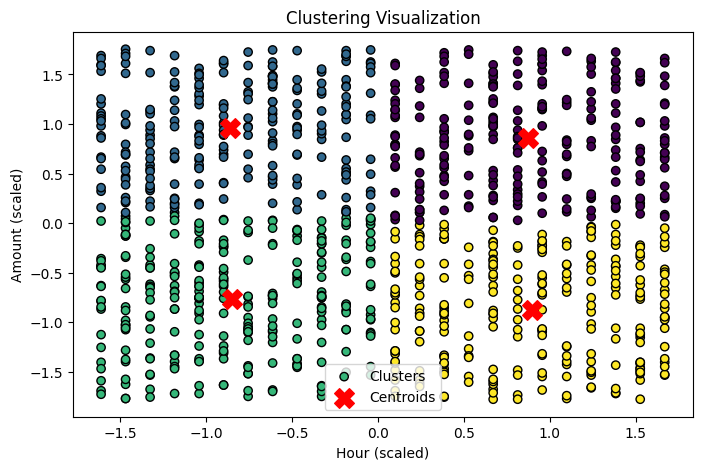

The new transaction will be in cluster 1
Cluster Summary (Mean Fraud Status):
   Clusters  Status
0         0     1.0
1         1     1.0
2         2     1.0
3         3     1.0


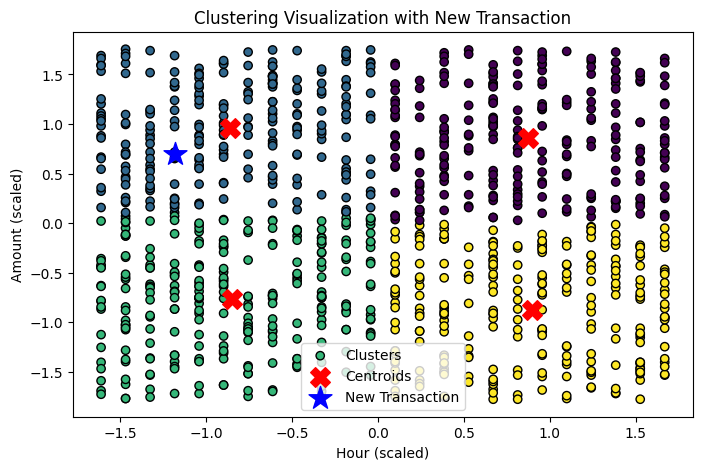

Sample of Fraudulent Transactions:
     Transaction ID  Amount  Hour MerchantCategory location Status  Clusters
254             255     319    19      Electronics   City D  Fraud         0
143             144     423    19         Clothing   City C  Fraud         0
885             886     373    23      Restaurants   City A  Fraud         0
746             747     100     6      Restaurants   City C  Fraud         2
1                 2     440     8      Electronics   City C  Fraud         1
961             962     417    10      Restaurants   City D  Fraud         1
711             712     219    11         Clothing   City A  Fraud         2
370             371     212     9          Grocery   City A  Fraud         2
130             131     349     8          Grocery   City A  Fraud         1
31               32     165     0      Electronics   City B  Fraud         2
696             697      69    20         Clothing   City C  Fraud         3
252             253     156    19      Re

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# Set seed for reproducibility
np.random.seed(42)

# --------------------------
# 1. Dataset Creation
# --------------------------
transaction = 1000

TransactionID = np.arange(1, transaction + 1)
Amount = np.random.randint(5, 500, size=transaction)
Hour = np.random.randint(0, 24, size=transaction)
MerchantCategory = np.random.choice(['Grocery', 'Electronics', 'Clothing', 'Restaurants'], size=transaction)
location = np.random.choice(['City A', 'City B', 'City C', 'City D'], size=transaction)
Fraud = ((Amount > 300) & Hour < 6).astype(int)

sample_data = {
    "Transaction ID": TransactionID,
    "Amount": Amount,
    "Hour": Hour,
    "MerchantCategory": MerchantCategory,
    "location": location,
    "Status": Fraud
}

df_transact = pd.DataFrame.from_dict(sample_data)

# --------------------------
# 2. Data Visualization & Scaling
# --------------------------
transact_features = df_transact[['Hour', 'Amount']].values

# Plot original data distribution
plt.figure(figsize=(8, 5))
plt.scatter(transact_features[:, 0], transact_features[:, 1], color="brown", label="Original data")
plt.title("Original Transaction Data Distribution")
plt.xlabel("Hour")
plt.ylabel("Amount")
plt.legend()
plt.show()

# Function to scale data (mean=0, std=1)
def scale(datax):
    data_mean = np.mean(datax, axis=0)
    data_std = np.std(datax, axis=0)
    # Avoid division by zero
    data_std = np.where(data_std == 0, 1e-6, data_std)
    normalized = (datax - data_mean) / data_std
    return normalized, data_mean, data_std

transact_scaled, data_mean, data_std = scale(transact_features)

# --------------------------
# 3. Custom K-Means Clustering
# --------------------------
def initialize_centroids(X, k):
    """Initialize centroids using the k-means++ algorithm."""
    n_samples = X.shape[0]
    centroids = []
    # Choose the first centroid randomly.
    first_index = np.random.randint(0, n_samples)
    centroids.append(X[first_index])
    
    # Choose the remaining centroids.
    for _ in range(1, k):
        # Compute distances to the nearest existing centroid
        distances = np.min(cdist(X, np.array(centroids), metric='euclidean'), axis=1)
        # Use squared distances for probability (k-means++ criterion)
        probabilities = distances**2 / np.sum(distances**2)
        next_index = np.random.choice(n_samples, p=probabilities)
        centroids.append(X[next_index])
    
    return np.array(centroids)

def assign_clusters(X, centroids):
    """Assign each sample to the nearest centroid."""
    distances = cdist(X, centroids, metric='euclidean')
    labels = np.argmin(distances, axis=1)
    return labels

def update_centroids(X, labels, k):
    """Update centroids by taking the mean of points in each cluster.
       If a cluster has no points, reinitialize its centroid randomly.
    """
    centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        cluster_points = X[labels == i]
        if len(cluster_points) == 0:
            # Reinitialize empty cluster with a random point
            centroids[i] = X[np.random.randint(0, X.shape[0])]
        else:
            centroids[i] = np.mean(cluster_points, axis=0)
    return centroids

def compute_inertia(X, labels, centroids):
    """Compute the inertia (sum of squared distances) for the clusters."""
    inertia = 0.0
    for i in range(centroids.shape[0]):
        cluster_points = X[labels == i]
        inertia += np.sum(np.linalg.norm(cluster_points - centroids[i], axis=1) ** 2)
    return inertia

def k_means(X, k, max_iter=100, tol=1e-4):
    """Perform K-Means clustering."""
    centroids = initialize_centroids(X, k)
    for iteration in range(max_iter):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        # Check for convergence
        if np.linalg.norm(new_centroids - centroids) < tol:
            print(f"Converged after {iteration + 1} iterations")
            centroids = new_centroids
            break
        centroids = new_centroids
    inertia = compute_inertia(X, labels, centroids)
    return centroids, labels, inertia

# --------------------------
# 4. Elbow Method to Determine Optimal K
# --------------------------
K_values = range(1, 11)
inertias = []

for k in K_values:
    _, _, inertia = k_means(transact_scaled, k)
    inertias.append(inertia)

plt.figure(figsize=(8, 5))
plt.plot(K_values, inertias, color='orange', linestyle='--', marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

# For this example, we choose k = 2 based on the elbow plot.
optimal_k = 4
Centroids, Labels, _ = k_means(transact_scaled, optimal_k)

# --------------------------
# 5. Clustering Visualization
# --------------------------
plt.figure(figsize=(8, 5))
plt.scatter(transact_scaled[:, 0], transact_scaled[:, 1], c=Labels, cmap='viridis', edgecolor='k', label="Clusters")
plt.scatter(Centroids[:, 0], Centroids[:, 1], marker='X', color='red', s=200, label="Centroids")
plt.title("Clustering Visualization")
plt.xlabel("Hour (scaled)")
plt.ylabel("Amount (scaled)")
plt.legend()
plt.show()

# --------------------------
# 6. New Transaction Prediction
# --------------------------
# New transaction is provided in the format [Hour, Amount]
new_transaction = np.array([[3, 350]])
new_transaction_scaled = (new_transaction - data_mean) / data_std
new_transaction_cluster = assign_clusters(new_transaction_scaled, Centroids)
print(f'The new transaction will be in cluster {new_transaction_cluster[0]}')

# --------------------------
# 7. Data Summary and Final Visualization
# --------------------------
# Add cluster labels to the DataFrame
df_transact['Clusters'] = Labels

# Compute and print the mean fraud status per cluster
cluster_summary = df_transact.groupby('Clusters')['Status'].mean().reset_index()
print("Cluster Summary (Mean Fraud Status):")
print(cluster_summary)

# Map fraud status values to human-readable strings
df_transact['Status'] = df_transact['Status'].map({1: "Fraud", 0: "Not Fraud"})

# Plot clusters along with the new transaction
plt.figure(figsize=(8, 5))
plt.scatter(transact_scaled[:, 0], transact_scaled[:, 1], c=Labels, cmap='viridis', edgecolor='k', label="Clusters")
plt.scatter(Centroids[:, 0], Centroids[:, 1], marker='X', color='red', s=200, label="Centroids")
plt.scatter(new_transaction_scaled[0, 0], new_transaction_scaled[0, 1], marker='*', s=300, color="blue", label="New Transaction")
plt.title("Clustering Visualization with New Transaction")
plt.xlabel("Hour (scaled)")
plt.ylabel("Amount (scaled)")
plt.legend()
plt.show()

# Display a sample of transactions labeled as Fraud
print("Sample of Fraudulent Transactions:")
print(df_transact.loc[df_transact['Status'] == 'Fraud'].sample(20))


In [56]:
# Gausian Mixture Models

K = 1, BIC = 1299.13
K = 2, BIC = 899.21
K = 3, BIC = 927.85
K = 4, BIC = 952.72
K = 5, BIC = 983.82
K = 6, BIC = 1015.29

Optimal number of clusters (lowest BIC): 2


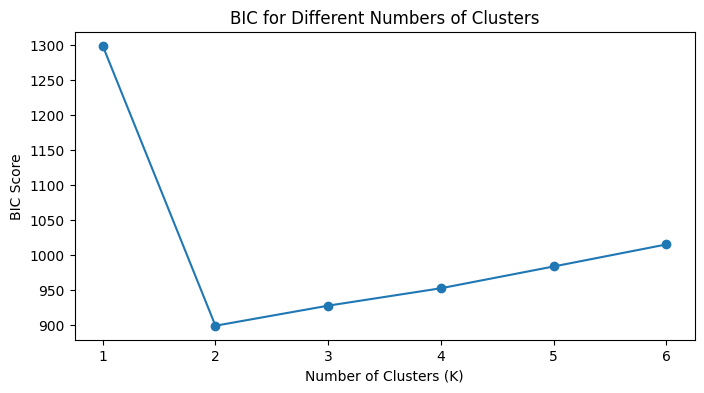

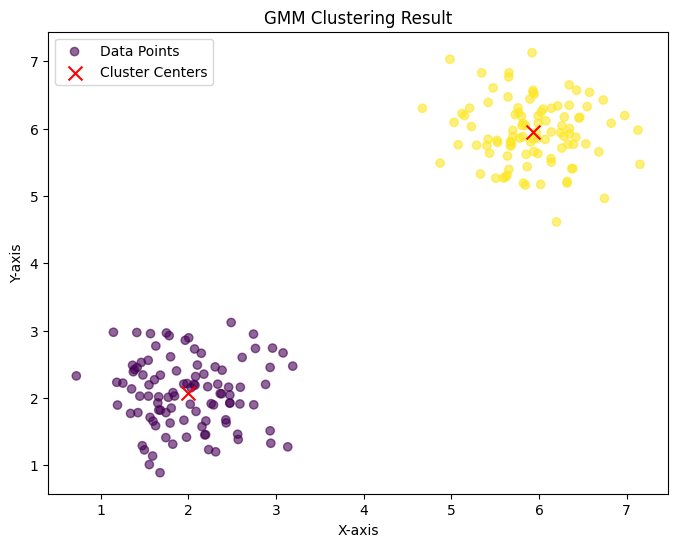

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# --- Helper Functions ---

def multivariate_gaussian(X, mean, cov):
    """Compute the multivariate Gaussian probability density function for all samples in X."""
    d = X.shape[1]  # Dimensionality
    det_cov = np.linalg.det(cov)
    inv_cov = np.linalg.inv(cov)
    norm_factor = 1 / np.sqrt((2 * np.pi) ** d * det_cov)
    
    diff = X - mean
    exp_term = np.exp(-0.5 * np.einsum('ij,jk,ik->i', diff, inv_cov, diff))
    
    return norm_factor * exp_term

def initialize_parameters(X, n_components):
    """Randomly initialize the means, covariances, and mixing coefficients."""
    np.random.seed(0)
    n_samples, n_features = X.shape
    
    # Randomly select initial means from the data
    means = X[np.random.choice(n_samples, n_components, replace=False)]
    
    # Initialize covariances as identity matrices for each component
    covariances = np.array([np.eye(n_features) for _ in range(n_components)])
    
    # Initialize mixing coefficients uniformly
    weights = np.ones(n_components) / n_components
    
    return means, covariances, weights

# --- EM Algorithm Steps ---

def expectation_step(X, means, covariances, weights):
    """E-step: Compute responsibilities (posterior probabilities) for each data point and component."""
    n_samples = X.shape[0]
    n_components = len(weights)
    responsibilities = np.zeros((n_samples, n_components))
    
    for k in range(n_components):
        responsibilities[:, k] = weights[k] * multivariate_gaussian(X, means[k], covariances[k])
    
    # Normalize the responsibilities over all components for each sample
    responsibilities /= responsibilities.sum(axis=1, keepdims=True)
    
    return responsibilities

def maximization_step(X, responsibilities):
    """M-step: Update means, covariances, and mixing coefficients based on responsibilities."""
    n_samples, n_features = X.shape
    n_components = responsibilities.shape[1]
    
    # Effective number of points assigned to each component
    Nk = responsibilities.sum(axis=0)
    
    # Update means
    means = (responsibilities.T @ X) / Nk[:, np.newaxis]
    
    # Update covariances
    covariances = np.zeros((n_components, n_features, n_features))
    for k in range(n_components):
        diff = X - means[k]
        covariances[k] = (responsibilities[:, k][:, np.newaxis] * diff).T @ diff / Nk[k]
    
    # Update mixing coefficients
    weights = Nk / n_samples
    
    return means, covariances, weights

def gmm_fit(X, n_components, max_iters=100, tol=1e-6):
    """Fits a Gaussian Mixture Model using the EM algorithm."""
    means, covariances, weights = initialize_parameters(X, n_components)
    log_likelihoods = []
    
    for _ in range(max_iters):
        # E-step: compute responsibilities
        responsibilities = expectation_step(X, means, covariances, weights)
        
        # M-step: update parameters
        new_means, new_covariances, new_weights = maximization_step(X, responsibilities)
        
        # Calculate the log likelihood of the current model
        likelihood = np.zeros(X.shape[0])
        for k in range(n_components):
            likelihood += new_weights[k] * multivariate_gaussian(X, new_means[k], new_covariances[k])
        log_likelihood = np.sum(np.log(likelihood))
        log_likelihoods.append(log_likelihood)
        
        # Check for convergence (change in log likelihood is below the tolerance)
        if len(log_likelihoods) > 1 and np.abs(log_likelihoods[-1] - log_likelihoods[-2]) < tol:
            break
        
        means, covariances, weights = new_means, new_covariances, new_weights
    
    # Final responsibilities using the converged parameters
    responsibilities = expectation_step(X, means, covariances, weights)
    return means, covariances, weights, responsibilities

# --- BIC Computation ---

def compute_bic(X, means, covariances, weights):
    """Compute the Bayesian Information Criterion (BIC) for a GMM."""
    n_samples, n_features = X.shape
    n_components = len(weights)
    
    # Compute log-likelihood for the entire dataset
    likelihood = np.zeros(n_samples)
    for k in range(n_components):
        likelihood += weights[k] * multivariate_gaussian(X, means[k], covariances[k])
    log_likelihood = np.sum(np.log(likelihood))
    
    # Calculate the number of free parameters:
    # Means: n_components * n_features
    # Covariances: n_components * (n_features*(n_features+1)/2) [symmetric matrices]
    # Weights: n_components - 1 (since they sum to 1)
    p = n_components * n_features
    p += n_components * (n_features * (n_features + 1)) // 2
    p += n_components - 1
    
    # BIC formula
    bic = -2 * log_likelihood + p * np.log(n_samples)
    return bic

def gmm_fit_with_bic(X, n_components, max_iters=100, tol=1e-6):
    """Fits a GMM and computes the BIC score."""
    means, covariances, weights, _ = gmm_fit(X, n_components, max_iters, tol)
    bic = compute_bic(X, means, covariances, weights)
    return means, covariances, weights, bic

# --- Main Code Flow ---

# Generate synthetic data: Two clusters from different Gaussian distributions
np.random.seed(0)
X = np.vstack([
    np.random.normal(loc=[2, 2], scale=0.5, size=(100, 2)),
    np.random.normal(loc=[6, 6], scale=0.5, size=(100, 2))
])

# Try different numbers of clusters (K) to select the best model using BIC
bic_scores = []
K_values = range(1, 7)  # Testing K from 1 to 6

for K in K_values:
    _, _, _, bic = gmm_fit_with_bic(X, K)
    bic_scores.append(bic)
    print(f"K = {K}, BIC = {bic:.2f}")

# Choose the optimal number of clusters based on the lowest BIC
best_K = K_values[np.argmin(bic_scores)]
print(f"\nOptimal number of clusters (lowest BIC): {best_K}")

# Plot BIC scores for different K values
plt.figure(figsize=(8, 4))
plt.plot(K_values, bic_scores, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("BIC Score")
plt.title("BIC for Different Numbers of Clusters")
plt.show()

# Fit GMM with the best number of clusters and visualize the clustering result
means, covariances, weights, responsibilities = gmm_fit(X, best_K)
labels = np.argmax(responsibilities, axis=1)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', alpha=0.6, label='Data Points')
plt.scatter(means[:, 0], means[:, 1], c='red', marker='x', s=100, label='Cluster Centers')
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("GMM Clustering Result")
plt.legend()
plt.show()


In [1]:
# practice

K = 1, BIC = 1299.32
K = 2, BIC = 874.37
K = 3, BIC = 898.25
K = 4, BIC = 920.40
K = 5, BIC = 951.15
K = 6, BIC = 946.15

Optimal number of clusters (lowest BIC): 2


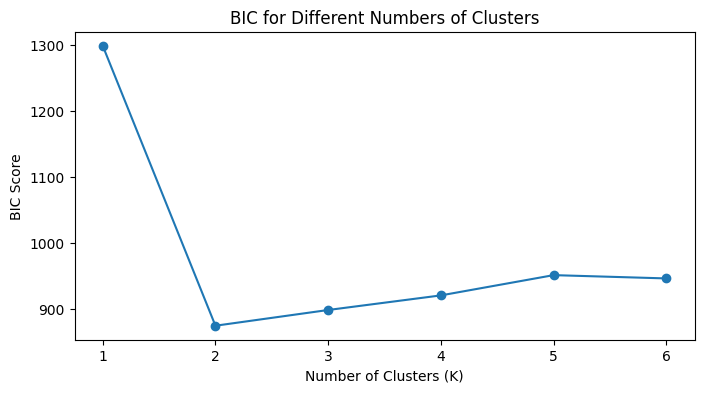

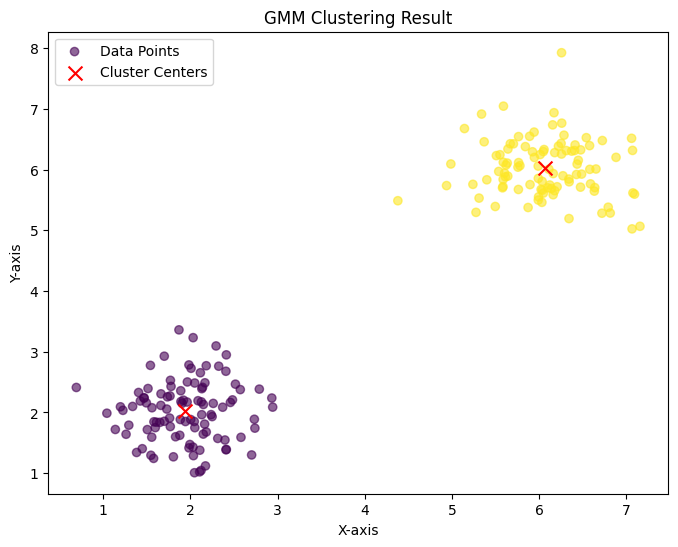

In [8]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Multivariate Gaussian function
def multivariate(data, mean, cov):
    d = data.shape[1]  # Number of features
    cov_inv = np.linalg.inv(cov)
    cov_det = np.linalg.det(cov)
    
    norm = 1 / np.sqrt((2 * np.pi)**d * cov_det)
    diff = data - mean
    exp_term = np.exp(-0.5 * np.einsum('ij,jk,ik->i', diff, cov_inv, diff))
    
    return norm * exp_term

# Initialize GMM parameters
def initialize(data, n_components):
    n_samples, n_features = data.shape
    mean = data[np.random.choice(n_samples, n_components, replace=False)]
    covariance = np.array([np.eye(n_features) for _ in range(n_components)])
    weights = np.ones(n_components) / n_components
    return mean, covariance, weights

# Expectation Step
def expectation_step(data, mean, covariance, weights):
    n_samples = data.shape[0]
    n_components = len(weights)
    
    responsibilities = np.zeros((n_samples, n_components))
    for k in range(n_components):
        responsibilities[:, k] = weights[k] * multivariate(data, mean[k], covariance[k])
    
    responsibilities /= responsibilities.sum(axis=1, keepdims=True)
    return responsibilities

# Maximization Step
def maximization_step(data, responsibilities):
    n_samples, n_features = data.shape
    n_components = responsibilities.shape[1]
    
    Nk = responsibilities.sum(axis=0)
    
    mean = (responsibilities.T @ data) / Nk[:, np.newaxis]
    
    covariance = np.zeros((n_components, n_features, n_features))
    for k in range(n_components):
        diff = data - mean[k]
        covariance[k] = (responsibilities[:, k][:, np.newaxis] * diff).T @ diff / Nk[k]

    weights = Nk / n_samples
    return mean, covariance, weights

# Fit GMM
def fit_gmm(data, n_components, iterations=100, tol=1e-6):
    mean, covariance, weights = initialize(data, n_components)
    loglikelihoods = []

    for _ in range(iterations):
        responsibilities = expectation_step(data, mean, covariance, weights)
        new_mean, new_covariance, new_weights = maximization_step(data, responsibilities)
        
        # Compute log-likelihood
        likelihood = np.zeros(data.shape[0])
        for k in range(n_components):
            likelihood += new_weights[k] * multivariate(data, new_mean[k], new_covariance[k])
        log_likelihood = np.sum(np.log(likelihood))
        loglikelihoods.append(log_likelihood)
        
        # Check for convergence
        if len(loglikelihoods) > 1 and np.abs(loglikelihoods[-1] - loglikelihoods[-2]) < tol:
            break

        mean, covariance, weights = new_mean, new_covariance, new_weights

    return mean, covariance, weights, responsibilities

# Compute BIC
def bic_computation(data, mean, covariance, weights):
    n_samples, n_features = data.shape
    n_components = len(weights)
    
    loglikelihood = np.zeros(n_samples)
    for k in range(n_components):
        loglikelihood += weights[k] * multivariate(data, mean[k], covariance[k])
    loglikelihood = np.sum(np.log(loglikelihood))
    
    # Compute number of parameters
    p = n_components * n_features + n_components * (n_features * (n_features + 1)) // 2 + (n_components - 1)
    
    bic = -2 * loglikelihood + p * np.log(n_samples)
    return bic

# Fit GMM with BIC selection
def bic_gmm_fitting(data, n_components, iterations=100, tol=1e-6):
    means, covariance, weights, responsibilities = fit_gmm(data, n_components, iterations, tol)
    bic = bic_computation(data, means, covariance, weights)
    return means, covariance, weights, responsibilities, bic

# Generate dataset
data = np.vstack([
    np.random.normal(loc=[2, 2], scale=0.5, size=(100, 2)),
    np.random.normal(loc=[6, 6], scale=0.5, size=(100, 2))
])

# Try different numbers of clusters (K) and compute BIC
bic_scores = []
K_values = range(1, 7)  # Testing K from 1 to 6

for k in K_values:
    _, _, _, _, bic = bic_gmm_fitting(data, k)
    bic_scores.append(bic)
    print(f"K = {k}, BIC = {bic:.2f}")

# Select the best K based on BIC
best_K = K_values[np.argmin(bic_scores)]
print(f"\nOptimal number of clusters (lowest BIC): {best_K}")

# Plot BIC scores
plt.figure(figsize=(8, 4))
plt.plot(K_values, bic_scores, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("BIC Score")
plt.title("BIC for Different Numbers of Clusters")
plt.show()

# Fit GMM with the best number of clusters and visualize results
means, covariances, weights, responsibilities, _ = bic_gmm_fitting(data, best_K)
labels = np.argmax(responsibilities, axis=1)

plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o', alpha=0.6, label='Data Points')
plt.scatter(means[:, 0], means[:, 1], c='red', marker='x', s=100, label='Cluster Centers')
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("GMM Clustering Result")
plt.legend()
plt.show()


In [9]:
# clustering customers

K = 1, BIC = 15835.35
K = 2, BIC = 15859.37
K = 3, BIC = 4386.52
K = 4, BIC = 10225.02
K = 5, BIC = 4417.12
K = 6, BIC = 4450.82

Optimal number of clusters (lowest BIC): 3


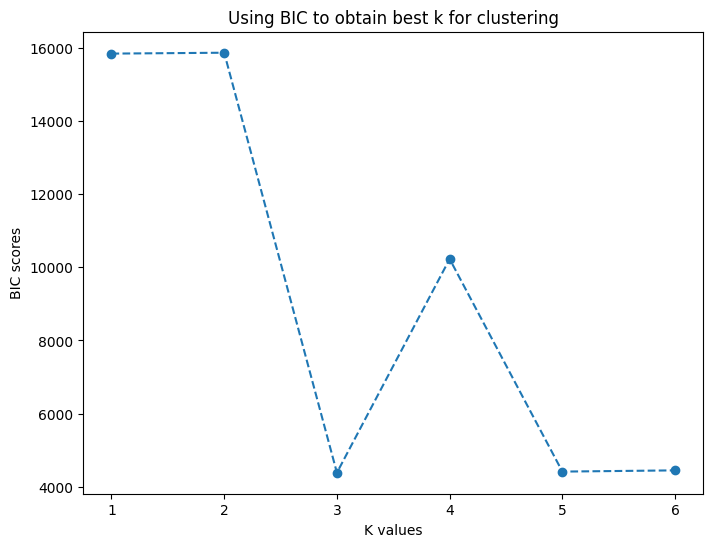

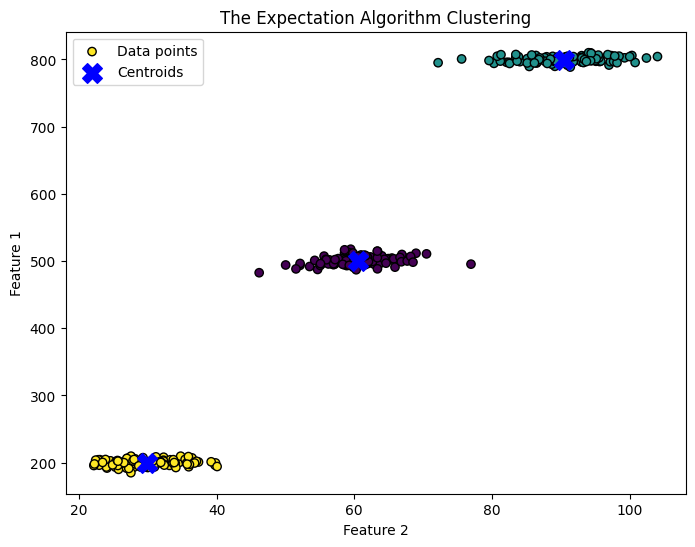

New customer cluster assignments: [2 0 1]


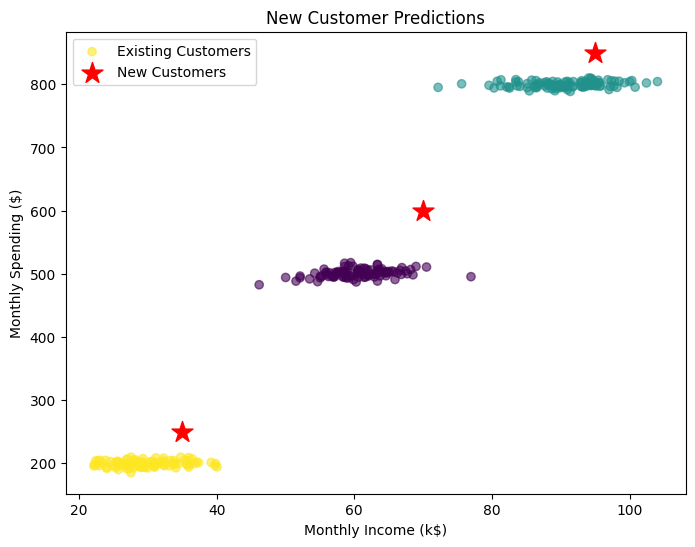

In [43]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# helper function
def Multivariate(x, mean, cov):
    dimension = x.shape[1]
    cov_inv = np.linalg.inv(cov)
    cov_det = np.linalg.det(cov)

    normalize = 1 / np.sqrt( (2 * np.pi)**dimension * cov_det)
    diff = x - mean
    
    expont = np.exp(-0.5 * np.einsum('ij,jk,ik->i', diff, cov_inv, diff))

    pdf = normalize * expont
    return pdf

# initialize 
def initialize_function(x, clusters):
    # initializing parameters(mean, cov, weights)
    n_samples, n_features = x.shape

    mean = x[np.random.choice(n_samples, clusters, replace = False)]
    covariance = np.array([np.eye(n_features) for _ in range(clusters)])
    weights = np.ones(clusters) / clusters

    return mean, covariance, weights

# expectation step
def Expectation_step(x, mean, covariance, weights):
    n_samples = x.shape[0]
    clusters = len(weights)

    responsibilities = np.zeros((n_samples, clusters))
    for k in range(clusters):
        responsibilities[:,k] = weights[k] * Multivariate(x, mean[k], covariance[k])

    sum_responsibilities = responsibilities.sum(axis=1, keepdims=True)
    sum_responsibilities[sum_responsibilities == 0] = np.finfo(float).eps     
    responsibilities /=  sum_responsibilities

    return responsibilities

# maximazation step
def Max_step(x, responsibilities):
    n_samples, n_features = x.shape
    clusters = responsibilities.shape[1]

    # posterior sum of all data pont
    Nk = responsibilities.sum(axis = 0)
    
    mean = (responsibilities.T @ x) / Nk[:, np.newaxis]
    
    covariance = np.zeros((clusters, n_features, n_features)) 
    for k in range(clusters):
        diff = x - mean[k]
        covariance[k] = (responsibilities[:,k][:,np.newaxis] * diff).T @ diff / Nk[k]

    weights = Nk / n_samples

    return mean, covariance, weights


# fiting gmm
def gmm_fiting(x, clusters, epochs = 100, tol = 1e-6):
    eps = np.finfo(float).eps  # A very small number
    mean, covariance, weights = initialize_function(x, clusters)
    loglikelihoods = []

    for _ in range(epochs):
        # compute responsibilities
        responsibilities = Expectation_step(x, mean, covariance, weights)

        # updated parameters
        new_mean, new_covariance, new_weight = Max_step(x, responsibilities)

        # computing log likelihood
        likelihood = np.zeros(x.shape[0])
        

        for k in range(clusters):
            likelihood += new_weight[k] * Multivariate(x, new_mean[k], new_covariance[k])
        loglikelihood = np.sum(np.log(likelihood + eps))
        loglikelihoods.append(loglikelihood)

        if len(loglikelihoods) > 1 and np.abs(loglikelihoods[-1] - loglikelihoods[-2]) < tol:
            break
        mean, covariance, weights = new_mean, new_covariance, new_weight
    return mean, covariance, weights, responsibilities


# computing bic
def bic_computation(x, mean, covariance, weights):
    eps = np.finfo(float).eps  # A very small number
    n_samples, n_features = x.shape
    clusters = len(weights)

    # performing loglikelohhd of entire dataset
    loglikelihood = np.zeros(n_samples)
    eps = np.finfo(float).eps  # A very small number
    for k in range(clusters):
        loglikelihood += weights[k] * Multivariate(x, mean[k], covariance[k])
    loglikelihood = np.sum(np.log(loglikelihood + eps))

    p = (clusters * n_features) + clusters * (n_features * (n_features + 1)) // 2 + (clusters - 1)

    bic = -2 * loglikelihood + p * np.log(n_samples)

    return bic

# fiting bic with gmm
def gmm_fited_bic(x, clusters):
    mean, covariance, weights, responsibilities = gmm_fiting(x, clusters, epochs = 100, tol = 1e-6)
    bic = bic_computation(x, mean, covariance, weights)
    return mean, covariance, weights, responsibilities, bic


def predict(x, means, covariances, weights):
    responsibilities = np.zeros((x.shape[0], len(weights)))
    for k in range(len(weights)):
        responsibilities[:, k] = weights[k] * Multivariate(x, means[k], covariances[k])
    responsibilities /= responsibilities.sum(axis=1, keepdims=True)
    labels = np.argmax(responsibilities, axis=1)
    return labels

# our dataset
n_customers = 300

# Cluster 1: Lower income, lower spending
cluster1 = np.random.multivariate_normal(mean=[30, 200], cov=[[20, 5], [5, 30]], size=100)

# Cluster 2: Moderate income, moderate spending
cluster2 = np.random.multivariate_normal(mean=[60, 500], cov=[[25, 10], [10, 40]], size=100)

# Cluster 3: High income, high spending
cluster3 = np.random.multivariate_normal(mean=[90, 800], cov=[[30, 5], [5, 25]], size=100)

data_features = np.vstack((cluster1, cluster2, cluster3))

k_values = range(1,7)
bic_scores = []

for k in k_values:
    _,_,_,_,bic = gmm_fited_bic(data_features, k)
    bic_scores.append(bic)
    print(f'K = {k}, BIC = {bic:.2f}')

best_K = k_values[np.argmin(bic_scores)]
print(f"\nOptimal number of clusters (lowest BIC): {best_K}")


# ploting
plt.figure(figsize=(8,6))
plt.plot(k_values, bic_scores, linestyle = '--', marker = 'o')
plt.title("Using BIC to obtain best k for clustering")
plt.ylabel("BIC scores")
plt.xlabel("K values")
plt.show()

# best parameters for GMM
mean, covariance, weights, responsibilities, _ = gmm_fited_bic(data_features, best_K)
labels = np.argmax(responsibilities, axis = 1)

# ploting
plt.figure(figsize=(8,6))
plt.scatter(data_features[:,0], data_features[:,1], cmap = 'viridis', c = labels, label = "Data points", edgecolor = 'k')
plt.scatter(mean[:,0], mean[:,1], color = 'blue', s = 200, label = 'Centroids', marker = 'X')
plt.title("The Expectation Algorithm Clustering")
plt.legend()
plt.ylabel("Feature 1")
plt.xlabel("Feature 2")
plt.show()


# new predictions
new_customers = np.array([
    [35, 250],  # likely from cluster 1 (lower income/spending)
    [70, 600],  # likely from cluster 2 (moderate)
    [95, 850]   # likely from cluster 3 (high)
])

predicted_labels = predict(new_customers, mean, covariance, weights)
print("New customer cluster assignments:", predicted_labels)

# Plot new customer predictions with the existing clusters
plt.figure(figsize=(8, 6))
plt.scatter(data_features[:, 0], data_features[:, 1], c=labels, cmap='viridis', marker='o', alpha=0.6, label='Existing Customers')
plt.scatter(new_customers[:, 0], new_customers[:, 1], color='red', marker='*', s=250, label='New Customers')
plt.xlabel("Monthly Income (k$)")
plt.ylabel("Monthly Spending ($)")
plt.title("New Customer Predictions")
plt.legend()
plt.show()

In [1]:
##Customer segmentation in retail

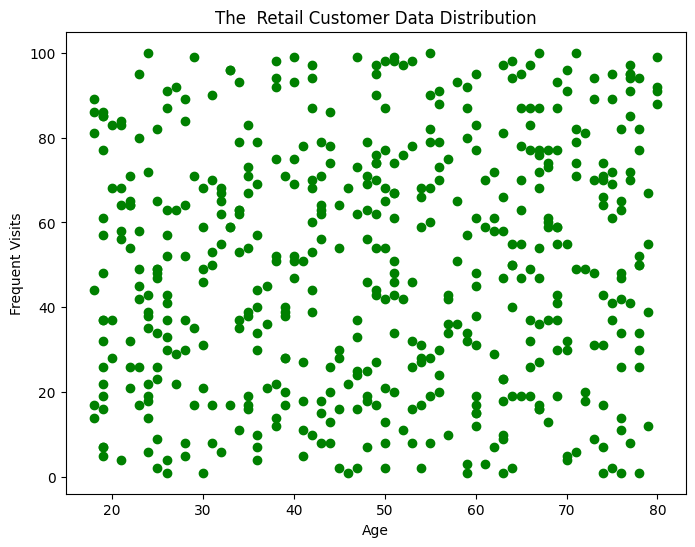

C:\Users\Admin\AppData\Local\Temp\ipykernel_2796\2649160120.py:84: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  inertia = np.sum( np.linalg.norm(x[labels == i] - centroids[i])**2 for i in range(len(centroids)) )


Converge after 2 iterations
Converge after 8 iterations
Converge after 34 iterations
Converge after 17 iterations
Converge after 12 iterations
Converge after 12 iterations
Converge after 12 iterations
Converge after 35 iterations
Converge after 11 iterations
Converge after 15 iterations


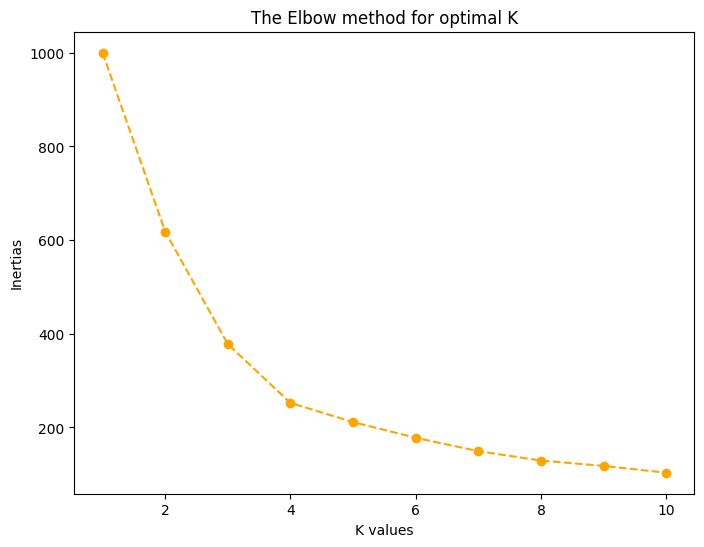

Converge after 15 iterations


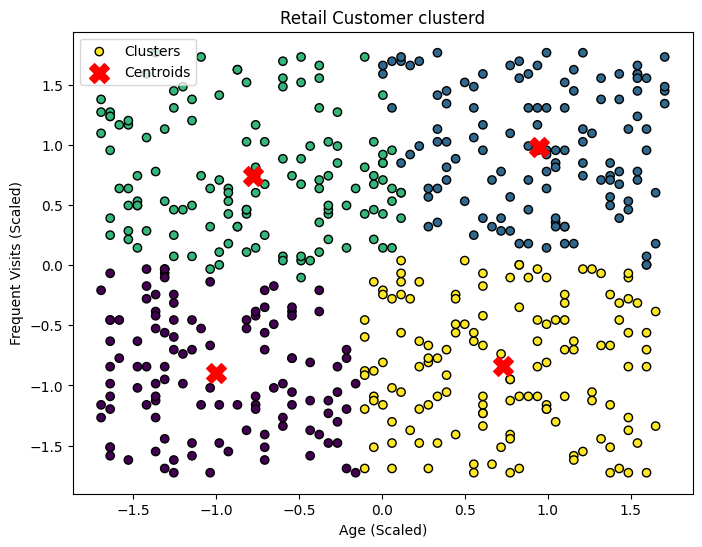

   Clusters  Loyalty Program Status
0         0                0.719298
1         1                0.959016
2         2                0.945736
3         3                0.711111
The new customer is assaigned cluster 1


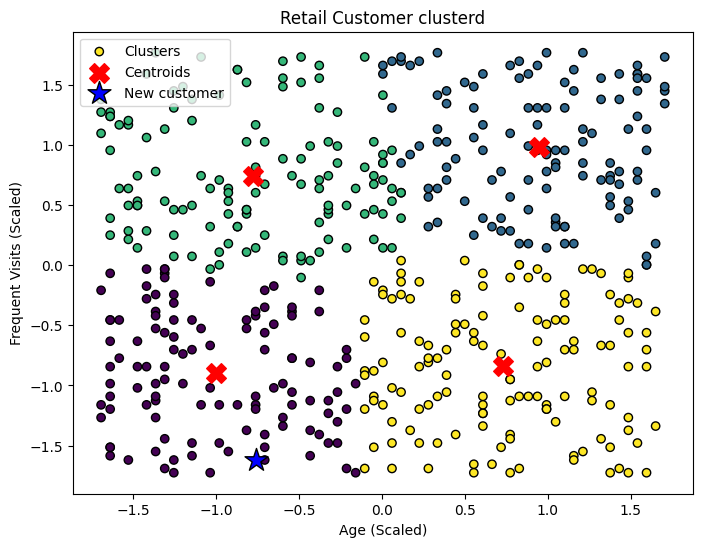

In [52]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

np.random.seed(5)

# data
samples = 500

Annual_income = np.random.randint(20000, 150000, size = samples)
Spending_scores = np.random.randint(1, 101, size = samples)
Age = np.random.randint(18, 81, size = samples)
Freq_visits = np.random.randint(0,11, size = samples)
Loyalty_program = ((Spending_scores > 60) | (Freq_visits > 2)).astype(int) # 1 loyal 0 not loyal


customer_data = {
    "Annual income" : Annual_income,
    "Spending scores" : Spending_scores,
    "Age": Age,
    "Freq_visits" : Freq_visits,
    "Loyalty Program Status" : Loyalty_program
}

df = pd.DataFrame.from_dict(customer_data)
df2 = df.copy()
df2['Loyalty Program Status'] = df2['Loyalty Program Status'].replace({1 : "Loyal", 0 : "Not Loyal"})

data_points = df[['Age',"Spending scores"]].values

# ploting
plt.figure(figsize=(8,6))
plt.title("The  Retail Customer Data Distribution")
plt.scatter(data_points[:,0], data_points[:,1], color = 'green', label = "Data")
plt.ylabel("Frequent Visits")
plt.xlabel("Age")
plt.show()

# scaling
def scaling(data):
    data_mean = np.mean(data, axis = 0)
    data_std = np.std(data, axis = 0)
    epsilion = 1e-6
    data_std = np.where(data_std == 0, epsilion, data_std)
    scaled = (data - data_mean) / data_std
    return data_mean, data_std, scaled

# data normalized
data_mean, data_std, data_scaled = scaling(data_points)
data_normalized = data_scaled


# initialize
def clusters_initialize(x, k):
    samples = x.shape[0]
    centroids = []
    
    first_index = np.random.randint(0, samples)
    centroids.append(x[first_index])

    for _ in range(1, k):
        distances = np.min(cdist(x, centroids, metric = "euclidean")**2, axis = 1)
        probability  = distances / distances.sum()

        next_index = np.random.choice(samples, p=probability)
        centroids.append(x[next_index])

    return np.array(centroids)

# assign
def assign(x, centroids):
    distance = cdist(x, centroids, metric = "euclidean")
    labels = np.argmin(distance, axis = 1)
    return labels

# update
def update_clusters(x, labels, k):
    centroids = np.array([x[labels == i].mean(axis=0) for i in range(k)])
    return centroids

# intertia
def compute_inertia(x, centroids, labels):
    inertia = np.sum( np.linalg.norm(x[labels == i] - centroids[i])**2 for i in range(len(centroids)) )
    return inertia

# kmeans
def K_means(x, k, max_iter = 100, tol = 1e-4):
    centroids = clusters_initialize(x, k)

    for i in range(max_iter):
        old_centroids = centroids.copy()
        labels = assign(x, centroids)
        centroids = update_clusters(x, labels, k)
        inertia = compute_inertia(x, centroids, labels)

        if np.linalg.norm(centroids - old_centroids) < tol:
            print(f"Converge after {i + 1} iterations")
            break

    return centroids, labels, inertia


# finding optimal k
k_values = range(1,11)
inertias = []

for k in k_values:
    _, _, inertia = K_means(data_normalized, k)
    inertias.append(inertia)

# ploting
plt.figure(figsize=(8,6))
plt.plot(k_values, inertias, color = "orange", linestyle = "--", marker = "o")
plt.title("The Elbow method for optimal K")
plt.ylabel("Inertias")
plt.xlabel("K values")
plt.show()

# optimal data
best_k = 4
centroids, labels, _ = K_means(data_normalized, best_k)

# ploting
plt.figure(figsize=(8,6))
plt.scatter(data_normalized[:,0], data_normalized[:,1], c = labels, cmap = 'viridis', edgecolor = 'k', label = "Clusters")
plt.scatter(centroids[:,0], centroids[:,1], s = 200, marker = "X", color = "red", label = "Centroids")
plt.title("Retail Customer clusterd")
plt.ylabel("Frequent Visits (Scaled)")
plt.xlabel("Age (Scaled)")
plt.legend()
plt.show()

df['Clusters'] = labels
summary = df.groupby('Clusters')['Loyalty Program Status'].mean().reset_index()
print(summary)


# new customer
new_data = [[35,4]]
new_data_scaled = (new_data - data_mean) / data_std
new_data_clusterd = assign(new_data, centroids)
print(f"The new customer is assaigned cluster {new_data_clusterd[0]}")

# ploting
plt.figure(figsize=(8,6))
plt.scatter(data_normalized[:,0], data_normalized[:,1], c = labels, cmap = 'viridis', edgecolor = 'k', label = "Clusters")
plt.scatter(centroids[:,0], centroids[:,1], s = 200, marker = "X", color = "red", label = "Centroids")
plt.scatter(new_data_scaled[:,0], new_data_scaled[:,1], marker = "*", s = 300, color = 'blue', edgecolor = 'k', label = "New customer")
plt.title("Retail Customer clusterd")
plt.ylabel("Frequent Visits (Scaled)")
plt.xlabel("Age (Scaled)")
plt.legend()
plt.show()



In [1]:
# IoT data clustering

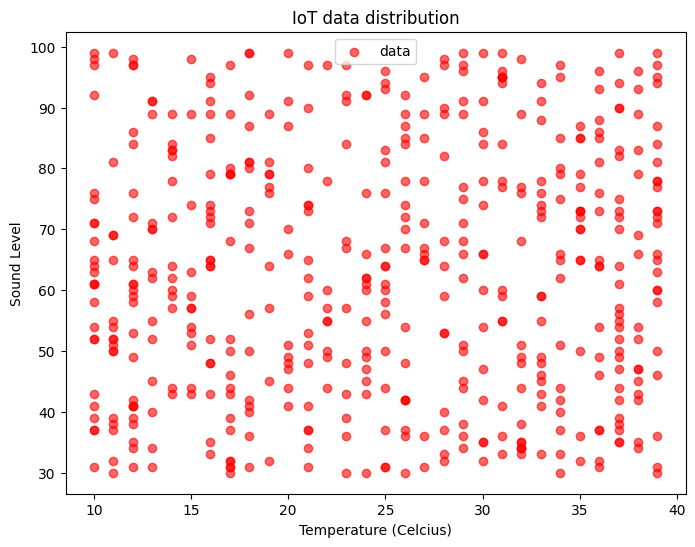

Converge after 2 iterations
Converge after 6 iterations
Converge after 10 iterations
Converge after 10 iterations
Converge after 13 iterations
Converge after 14 iterations
Converge after 13 iterations
Converge after 9 iterations
Converge after 14 iterations
Converge after 15 iterations


C:\Users\Admin\AppData\Local\Temp\ipykernel_14076\3162633506.py:79: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  result = np.sum( np.linalg.norm(data[labels == i] - centroids[i])**2 for i in range(len(centroids)) )


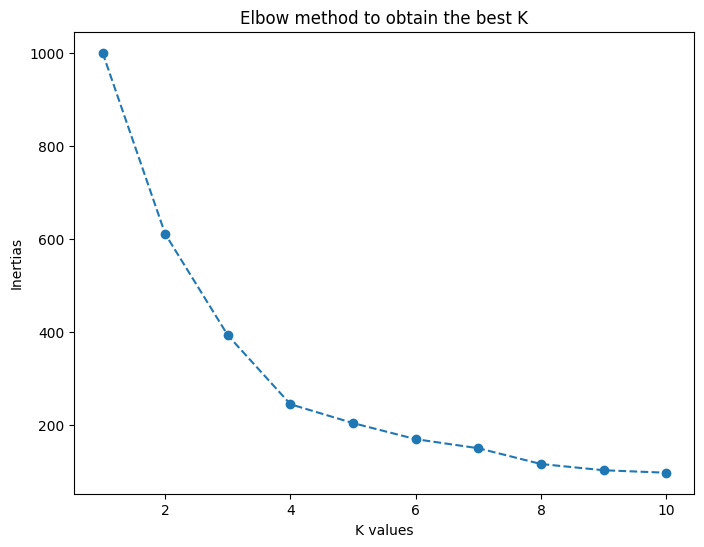

Converge after 16 iterations


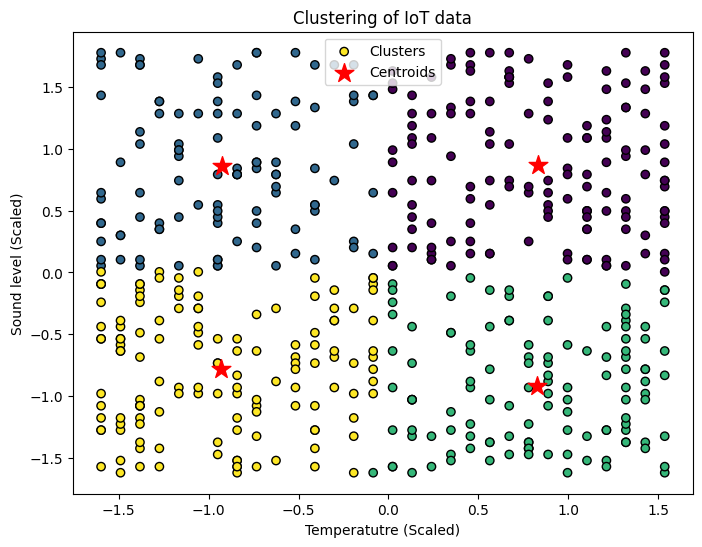

The new data is assigned cluster 2


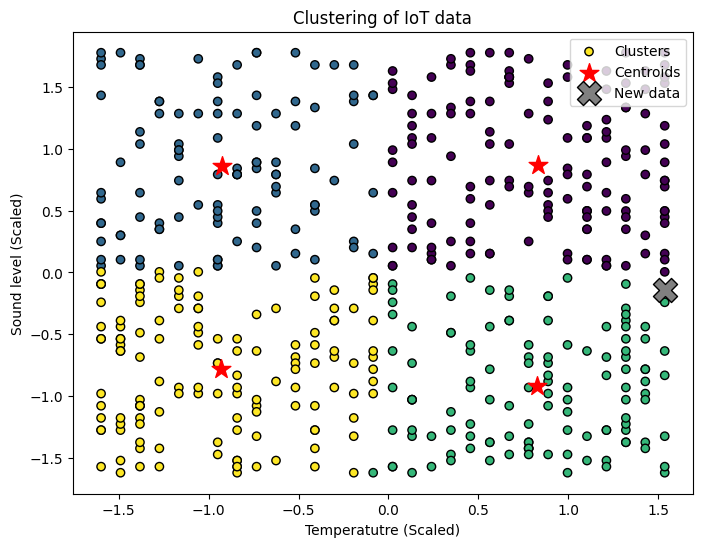

Temperature  Humidity  CO_two_level  Light Intensity  Sound Level  \
357           39        27           903             1435           73   
485           32        55          1132             6732           33   
484           31         9          1331             1949           33   
177           10        28           524             5085           43   
101           39        68           366             6212           60   
330           10        48           322             2469           61   
90            15        66           385             5415           57   
33            31        57          1396             7083           99   
318           29        20          1054             4311           36   
290           21        66          1250             9752           97   

     Clusters  
357         0  
485         2  
484         2  
177         3  
101         2  
330         3  
90          3  
33          0  
318         2  
290         1

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

np.random.seed(42)

# data set
samples = 500

Temperature = np.random.randint(10, 40, size = samples)
Humidity = np.random.randint(0, 101, size = samples)
CO_two_level = np.random.randint(300, 2001, size = samples)
Light_intensity = np.random.randint(0, 10000, size = samples)
Sound_level = np.random.randint(30, 100, size = samples)

# data frame
data_frame = pd.DataFrame({
    "Temperature" : Temperature,
    "Humidity" : Humidity,
    "CO_two_level" : CO_two_level,
    "Light Intensity" : Light_intensity,
    "Sound Level" : Sound_level
})


X = data_frame[["Temperature","Sound Level"]].values

# ploting
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], color = 'red', alpha = 0.6, label = 'data')
plt.title("IoT data distribution")
plt.xlabel("Temperature (Celcius)")
plt.ylabel("Sound Level")
plt.legend()
plt.show()

# scaling
def nomalize(x):
    mean = np.mean(x, axis = 0)
    std = np.std(x, axis = 0)
    std = np.where(std == 0, 1e-6, std)
    scaled = (x - mean) / std
    return  mean, std, scaled

# scaled data
mean, std, x_scaled = nomalize(X)
X_normalized = x_scaled

# initialize
def initialize_clusters(data, k):
    No_samples = data.shape[0]
    centroids = []

    first_index = np.random.randint(0, No_samples)
    centroids.append(data[first_index])

    for _ in range(1, k):
        distance = np.min( cdist(data, centroids, metric = 'euclidean')**2, axis = 1 )
        prob  = distance / distance.sum()
        next_index = np.random.choice(No_samples, p=prob)
        centroids.append(data[next_index])

    return np.array(centroids)

# assign
def assigne_clusters(data, centroids):
    distances = cdist(data, centroids, metric = 'euclidean')
    labels = np.argmin(distances, axis = 1)
    return labels

# update 
def cluster_update(data, labels, k):
    centroids = np.array([ data[labels == i].mean(axis=0) for i in range(k)])
    return centroids

# intertia
def elbow_method(data, labels, centroids):
    result = np.sum( np.linalg.norm(data[labels == i] - centroids[i])**2 for i in range(len(centroids)) )
    return result

# kmeans
def KMeans(data, k, iterations = 100, tol = 1e-6):
    centroids = initialize_clusters(data, k)

    for i in range(iterations):
        old_centroids = centroids.copy()
        labels = assigne_clusters(data, centroids)
        centroids = cluster_update(data, labels, k)
        inertia = elbow_method(data, labels, centroids)

        if np.linalg.norm(centroids - old_centroids) < tol:
            print(f"Converge after {i + 1} iterations")
            break

    return centroids, labels, inertia

# optimal k
Ks = range(1,11)
inertias = []

for k in Ks:
    _, _, inertia = KMeans(X_normalized, k)
    inertias.append(inertia)

# ploting
plt.figure(figsize=(8,6))
plt.plot(Ks, inertias, marker = 'o', linestyle = '--')
plt.title("Elbow method to obtain the best K")
plt.ylabel("Inertias")
plt.xlabel("K values")
plt.show()

# optimal k 
optimalK = 4
new_centroids, new_labels, _ =  KMeans(X_normalized, optimalK)

# ploting
plt.figure(figsize=(8,6))
plt.scatter(X_normalized[:,0], X_normalized[:,1], c = new_labels, cmap = 'viridis', label = "Clusters", edgecolor = "k")
plt.scatter(new_centroids[:,0], new_centroids[:,1], s = 200, color = 'red', marker = "*", label = "Centroids")
plt.title("Clustering of IoT data")
plt.ylabel("Sound level (Scaled)")
plt.xlabel("Temperatutre (Scaled)")
plt.legend()
plt.show()

# new data
new_data = [[39,60]]
new_x_scaled = (new_data - mean) / std
new_data_scaled = new_x_scaled
new_data_clusterd = assigne_clusters(new_data_scaled, new_centroids)
print(f"The new data is assigned cluster {new_data_clusterd[0]}")

# ploting
plt.figure(figsize=(8,6))
plt.scatter(X_normalized[:,0], X_normalized[:,1], c = new_labels, cmap = 'viridis', label = "Clusters", edgecolor = "k")
plt.scatter(new_centroids[:,0], new_centroids[:,1], s = 200, color = 'red', marker = "*", label = "Centroids")
plt.scatter(new_data_scaled[0,0], new_data_scaled[0,1], s = 300, color = 'gray', marker = "X", edgecolor = 'k', label = "New data")
plt.title("Clustering of IoT data")
plt.ylabel("Sound level (Scaled)")
plt.xlabel("Temperatutre (Scaled)")
plt.legend()
plt.show()

data_frame.head()
data2 = data_frame.copy()
data2['Clusters'] = new_labels
data2.sample(10)
